In [2]:
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv('Dataset/train_data_cleaned.csv')
val_data = pd.read_csv('Dataset/val_data_cleaned.csv')
test_data = pd.read_csv('Dataset/test_data_cleaned.csv')

combined_data = pd.concat([train_data, val_data, test_data])

In [61]:
#combined_data = pd.read_csv('../fake_or_real_news.csv')

In [3]:
fake_data = combined_data[combined_data['label'] == 0]
true_data = combined_data[combined_data['label'] == 1]


In [6]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize global resources
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove usernames (@username), links (http://...), and emails (example@domain.com)
    text = re.sub(r'@\w+', '', text)  # Remove usernames
    text = re.sub(r'http\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove emails

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Remove non-alphanumeric tokens
    tokens = [token for token in tokens if token.isalnum()]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

# Example usage
sample_text = "@user Check out this awesome website: https://example.com! It's amazing, isn't it?"
cleaned_tokens = preprocess_text(sample_text)
print(cleaned_tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RoG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RoG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RoG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['user', 'check', 'awesome', 'website', 'amazing', 'isnt']


In [59]:
def preprocess_text_to_string(text):
    tokens = preprocess_text(text)  # Call your existing preprocess_text function
    return " ".join(tokens)  # Join tokens back into a string


## Distribution Of Data

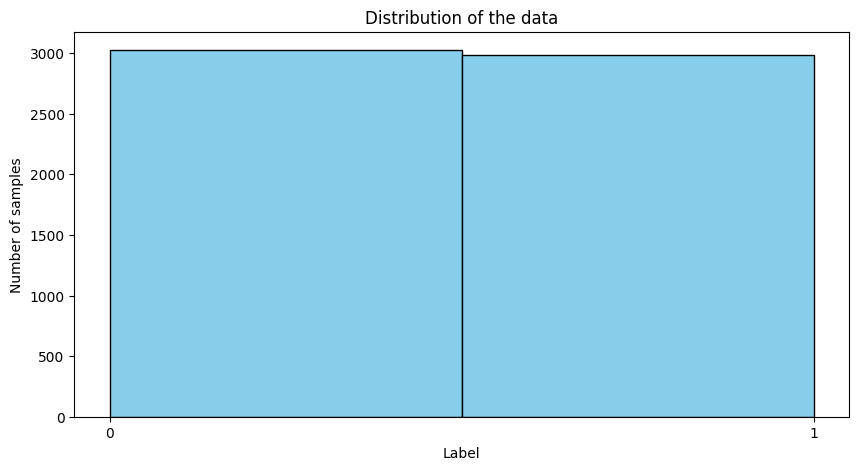

In [7]:
# Plotting the distribution of the data
plt.figure(figsize=(10, 5))
plt.hist(combined_data['label'], bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Label')
plt.ylabel('Number of samples')
plt.title('Distribution of the data')
plt.xticks([0, 1])
plt.show()

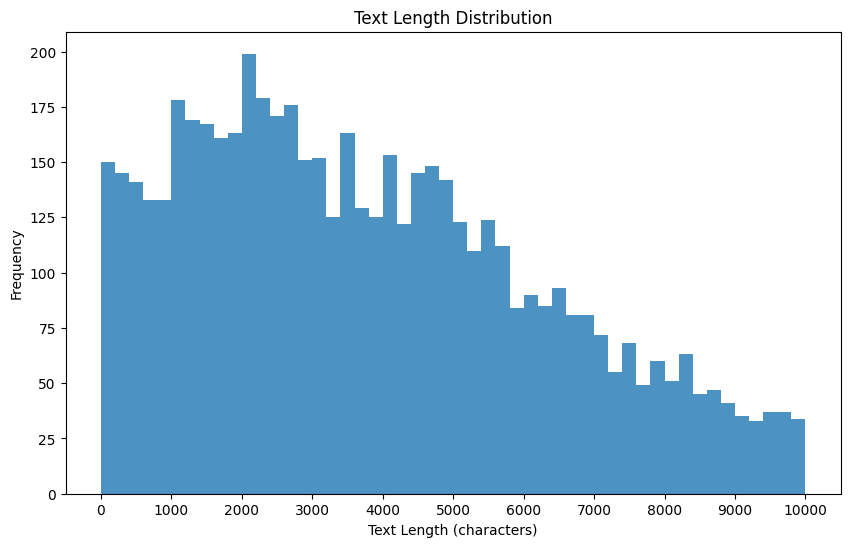

Text Length Statistics:
count      6010.000000
mean       4877.314309
std        5123.139185
min          12.000000
25%        1959.000000
50%        3822.000000
75%        6299.000000
max      115372.000000
Name: text_length, dtype: float64


In [8]:
combined_data['text_length'] = combined_data['text'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(combined_data['text_length'], bins=50, alpha=0.8, range=(0, 10000)) 
plt.title('Text Length Distribution')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')

plt.xticks(range(0, 10001, 1000))  

plt.show()

text_length_stats = combined_data['text_length'].describe()
print("Text Length Statistics:")
print(text_length_stats)


C:\Users\RoG\AppData\Local\Temp\ipykernel_20520\1660810787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_data['text_length'] = fake_data['text'].apply(len)


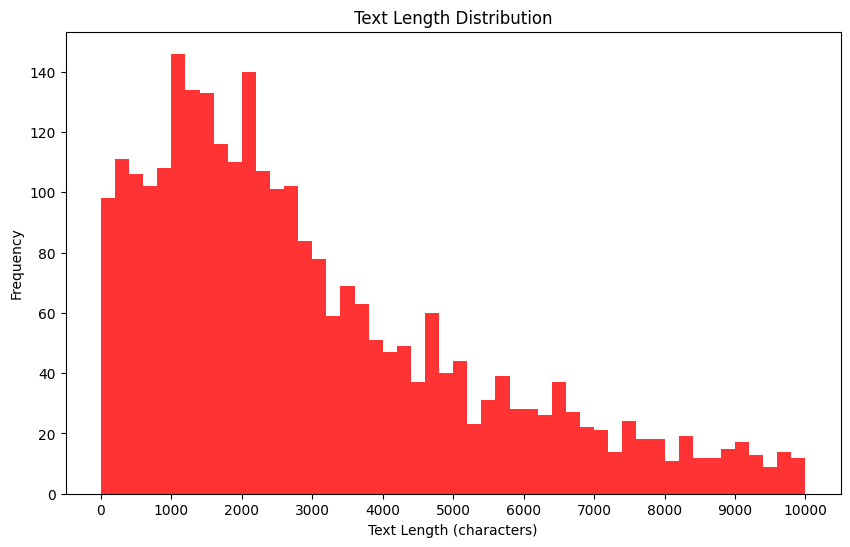

Text Length Statistics:
count      3025.000000
mean       4181.313058
std        5743.401140
min          12.000000
25%        1314.000000
50%        2602.000000
75%        5065.000000
max      115372.000000
Name: text_length, dtype: float64


In [9]:
fake_data['text_length'] = fake_data['text'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(fake_data['text_length'], bins=50, alpha=0.8, range=(0, 10000), color='red')
plt.title('Text Length Distribution')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')

plt.xticks(range(0, 10001, 1000))  

plt.show()

text_length_stats = fake_data['text_length'].describe()
print("Text Length Statistics:")
print(text_length_stats)


C:\Users\RoG\AppData\Local\Temp\ipykernel_20520\3108082841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_data['text_length'] = true_data['text'].apply(len)


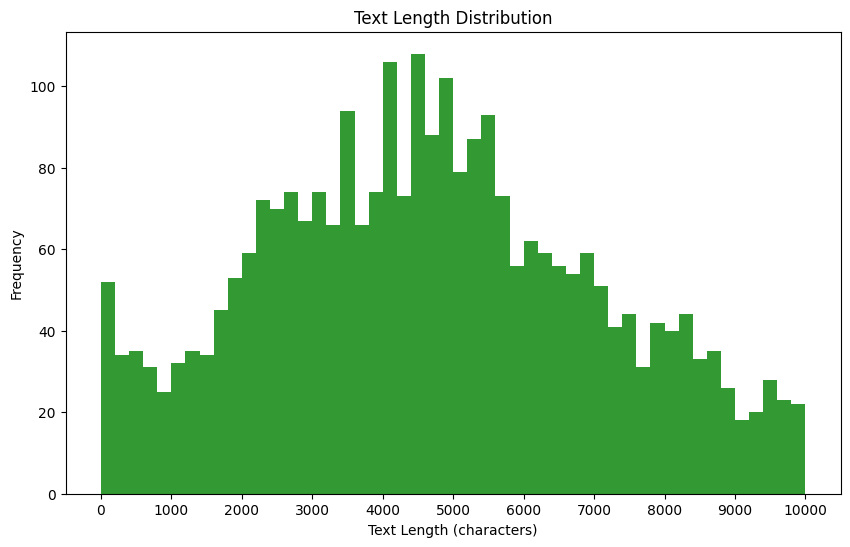

Text Length Statistics:
count     2985.000000
mean      5582.642211
std       4293.736327
min         43.000000
25%       3063.000000
50%       4841.000000
75%       6971.000000
max      44039.000000
Name: text_length, dtype: float64


In [10]:
true_data['text_length'] = true_data['text'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(true_data['text_length'], bins=50, alpha=0.8, range=(0, 10000), color='green')
plt.title('Text Length Distribution')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')

plt.xticks(range(0, 10001, 1000))  

plt.show()

text_length_stats = true_data['text_length'].describe()
print("Text Length Statistics:")
print(text_length_stats)


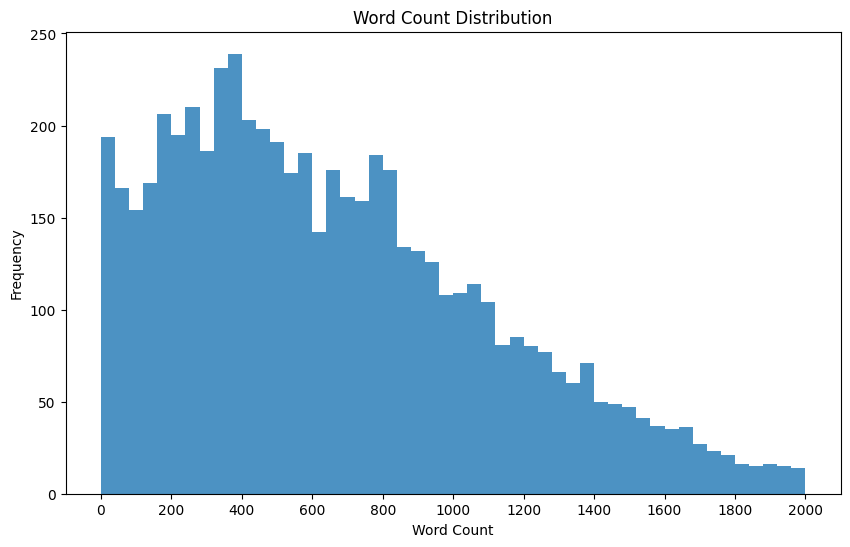

In [11]:
combined_data['word_count'] = combined_data['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
plt.hist(combined_data['word_count'], bins=50, alpha=0.8, range=(0, 2000))
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xticks(range(0, 2001, 200))
plt.show()


C:\Users\RoG\AppData\Local\Temp\ipykernel_20520\3977588403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_data['word_count'] = fake_data['text'].apply(lambda x: len(x.split()))


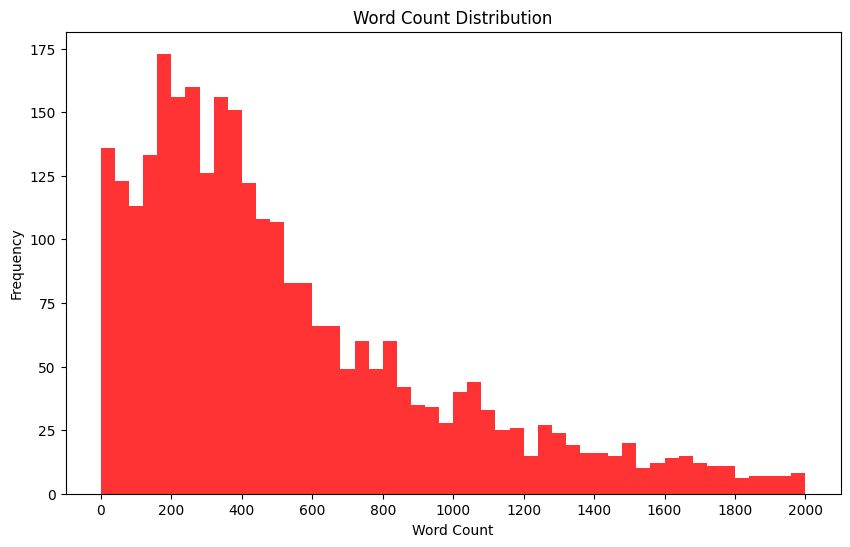

In [12]:
fake_data['word_count'] = fake_data['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
plt.hist(fake_data['word_count'], bins=50, alpha=0.8, range=(0, 2000), color='red')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xticks(range(0, 2001, 200))
plt.show()


C:\Users\RoG\AppData\Local\Temp\ipykernel_20520\1480494073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_data['word_count'] = true_data['text'].apply(lambda x: len(x.split()))


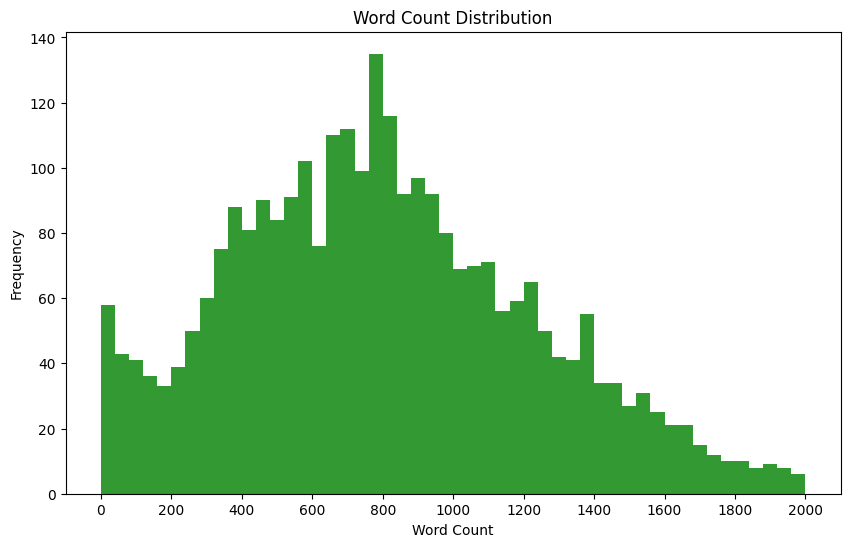

In [13]:
true_data['word_count'] = true_data['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
plt.hist(true_data['word_count'], bins=50, alpha=0.8, range=(0, 2000), color='green')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xticks(range(0, 2001, 200))
plt.show()


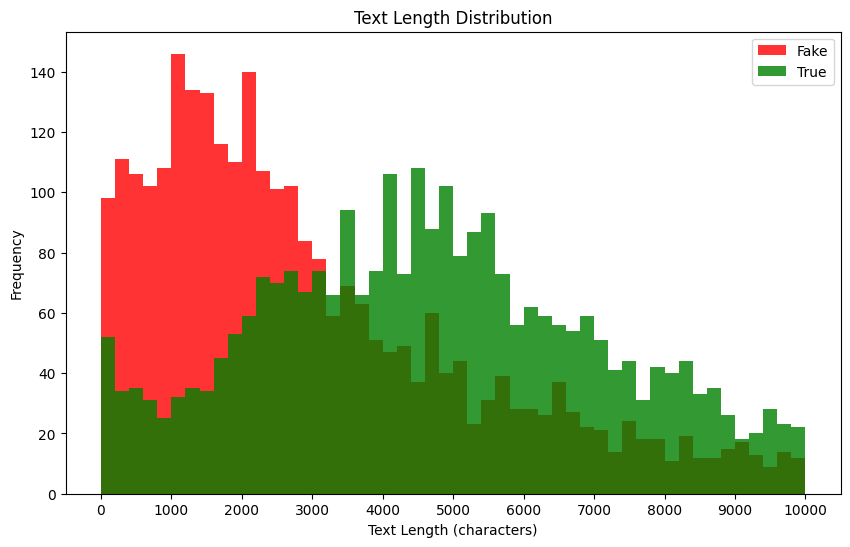

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(fake_data['text_length'], bins=50, alpha=0.8, range=(0, 10000), color='red', label='Fake')
plt.hist(true_data['text_length'], bins=50, alpha=0.8, range=(0, 10000), color='green', label='True')
plt.title('Text Length Distribution')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(range(0, 10001, 1000))
plt.show()


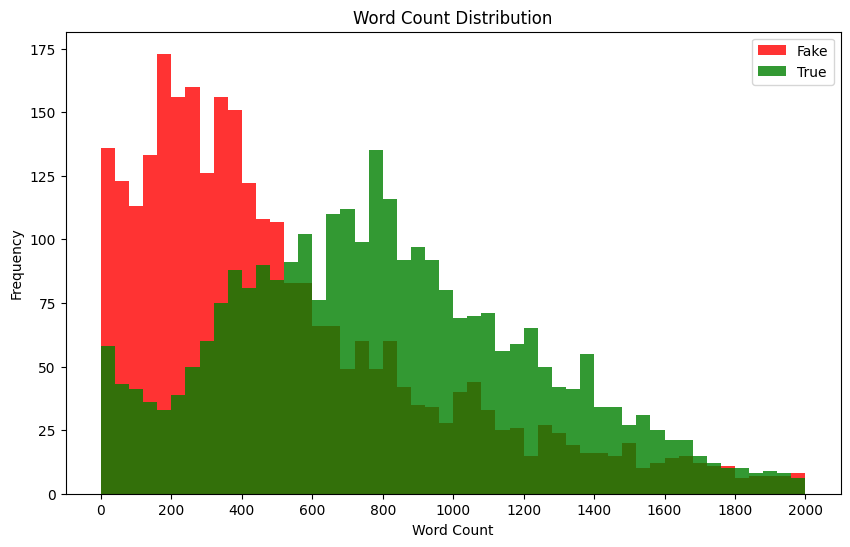

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(fake_data['word_count'], bins=50, alpha=0.8, range=(0, 2000), color='red', label='Fake')
plt.hist(true_data['word_count'], bins=50, alpha=0.8, range=(0, 2000), color='green', label='True')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(range(0, 2001, 200))
plt.show()

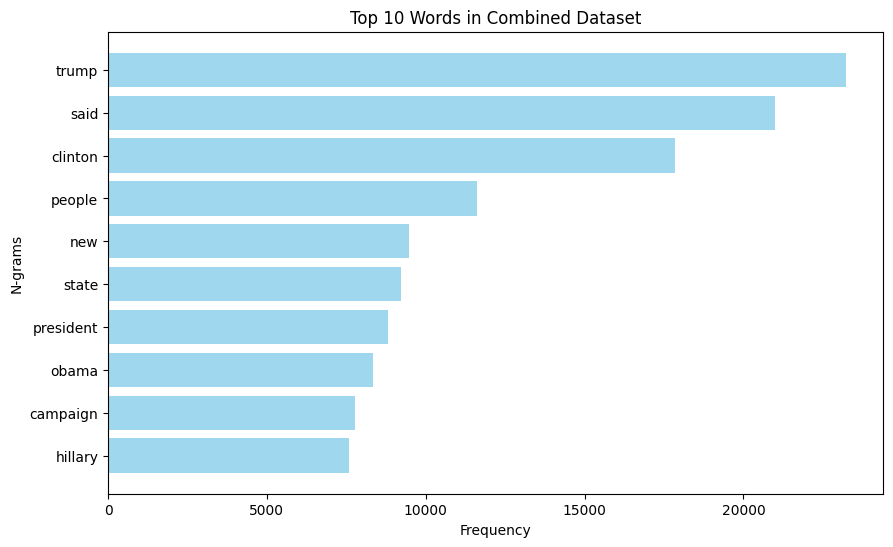

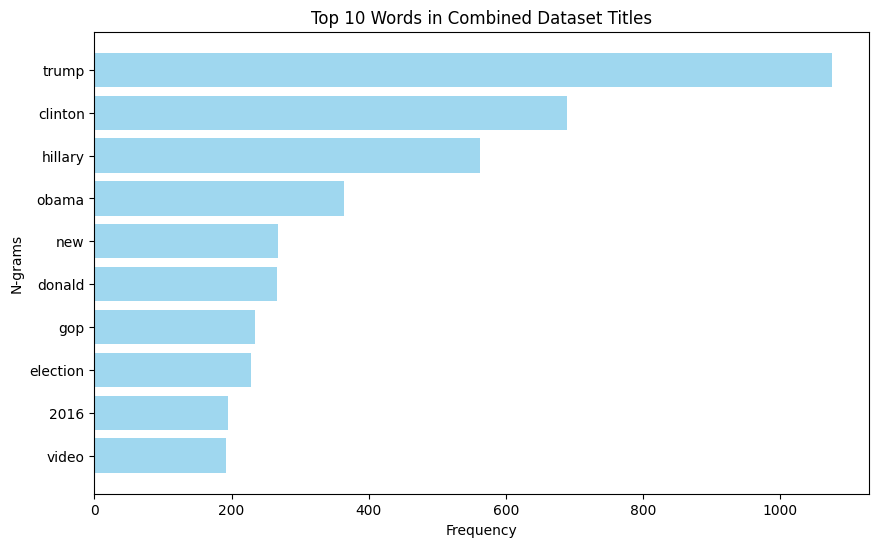

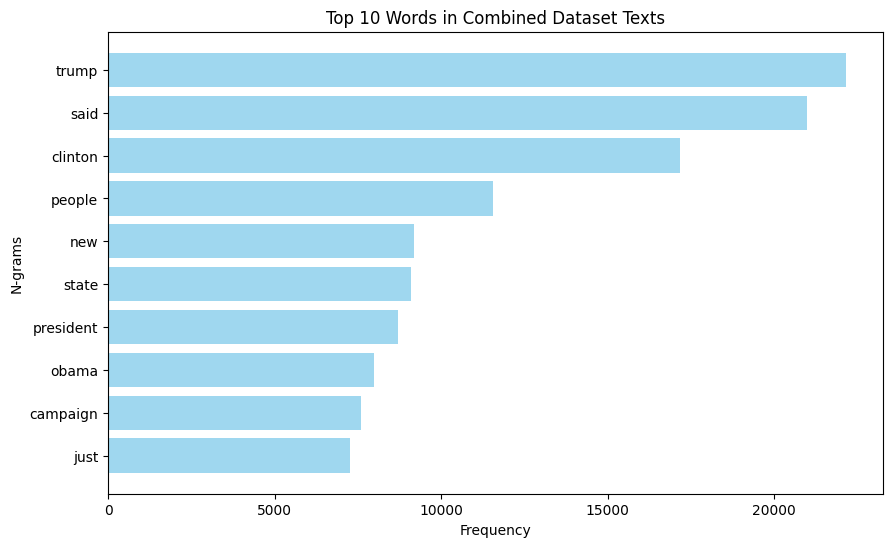

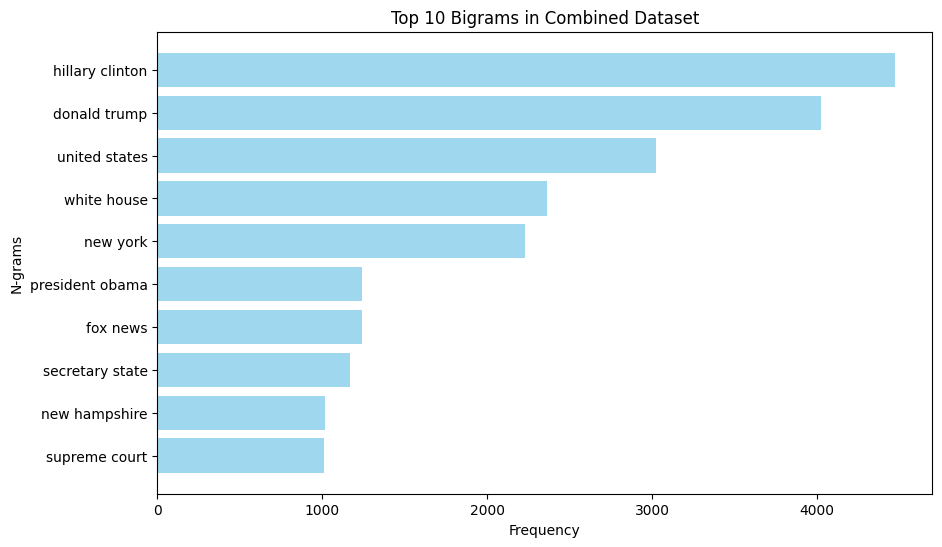

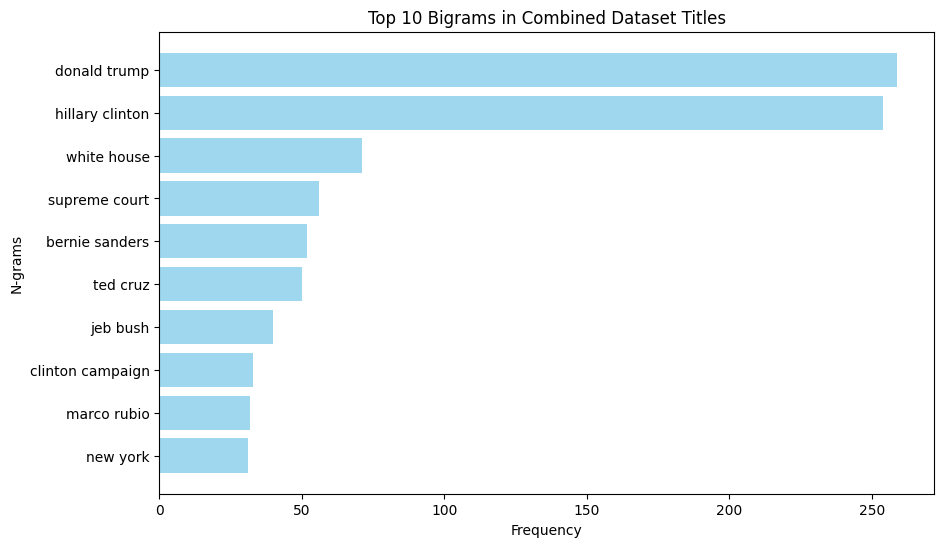

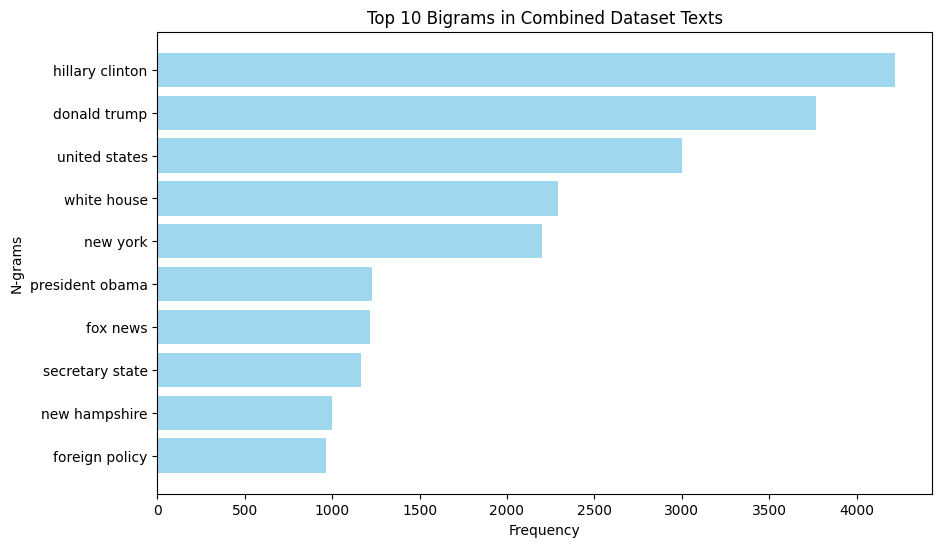

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter

combined_data['combined_text'] = combined_data['title'] + " " + combined_data['text']

def plot_top_ngrams(corpus, ngram_range=(1, 1), top_n=10, title="Top N-grams", color='skyblue'):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngram_counts = vectorizer.fit_transform(corpus)
    ngram_sums = ngram_counts.sum(axis=0).A1 
    ngram_names = vectorizer.get_feature_names_out()
    
    ngram_freq = dict(zip(ngram_names, ngram_sums))
    
    top_ngrams = Counter(ngram_freq).most_common(top_n)
    top_ngram_names = [ngram[0] for ngram in top_ngrams]
    top_ngram_values = [ngram[1] for ngram in top_ngrams]
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_ngram_names, top_ngram_values, alpha=0.8, color=color)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-grams")
    plt.gca().invert_yaxis()
    plt.show()

plot_top_ngrams(combined_data['combined_text'], ngram_range=(1, 1), top_n=10, title="Top 10 Words in Combined Dataset")

plot_top_ngrams(combined_data['title'], ngram_range=(1, 1), top_n=10, title="Top 10 Words in Combined Dataset Titles")

plot_top_ngrams(combined_data['text'], ngram_range=(1, 1), top_n=10, title="Top 10 Words in Combined Dataset Texts")

plot_top_ngrams(combined_data['combined_text'], ngram_range=(2, 2), top_n=10, title="Top 10 Bigrams in Combined Dataset")

plot_top_ngrams(combined_data['title'], ngram_range=(2, 2), top_n=10, title="Top 10 Bigrams in Combined Dataset Titles")

plot_top_ngrams(combined_data['text'], ngram_range=(2, 2), top_n=10, title="Top 10 Bigrams in Combined Dataset Texts")



C:\Users\RoG\AppData\Local\Temp\ipykernel_20520\806023074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_data['combined_text'] = fake_data['title'] + " " + fake_data['text']
C:\Users\RoG\AppData\Local\Temp\ipykernel_20520\806023074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_data['combined_text'] = true_data['title'] + " " + true_data['text']


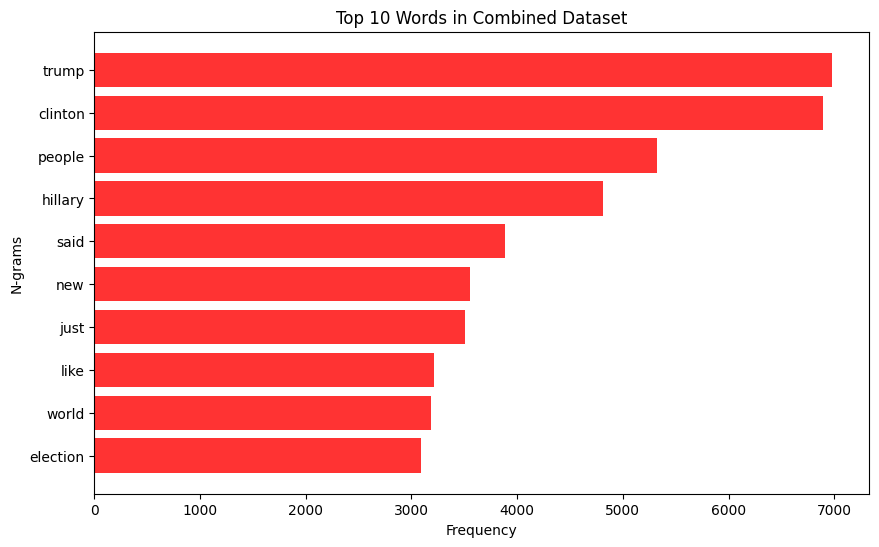

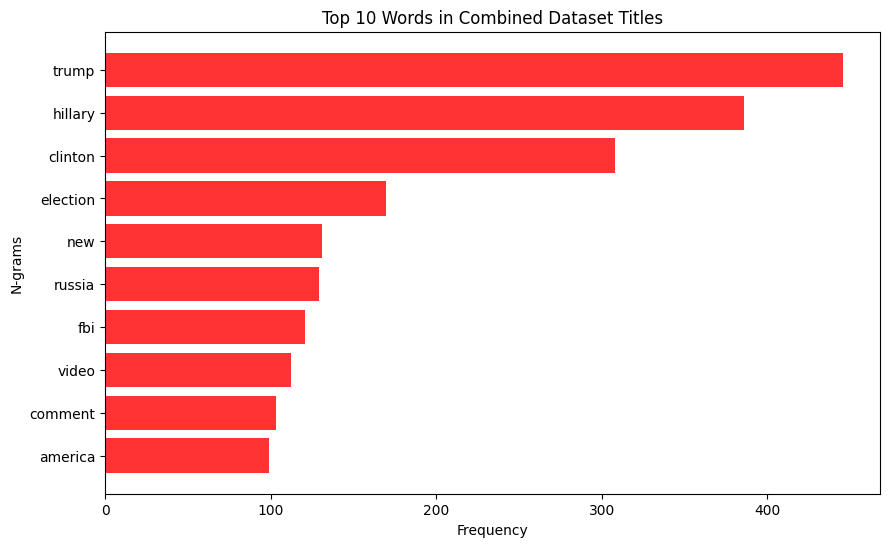

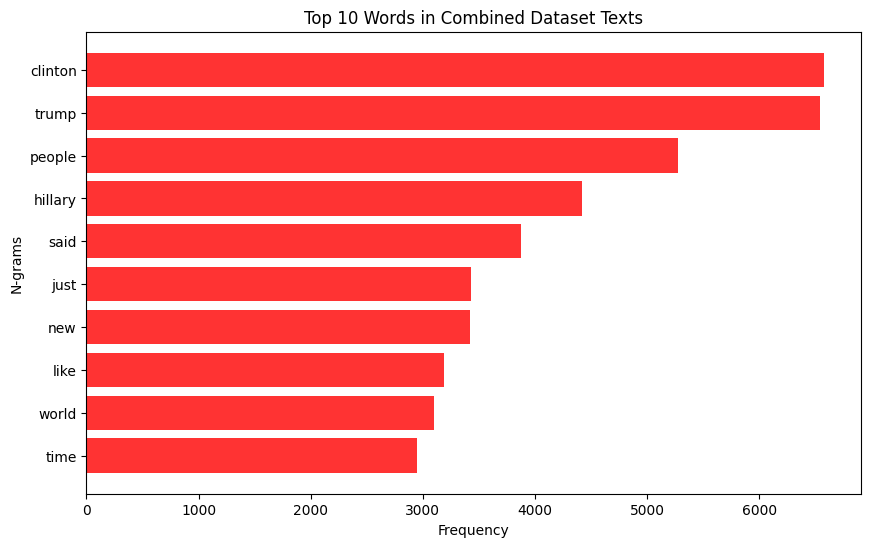

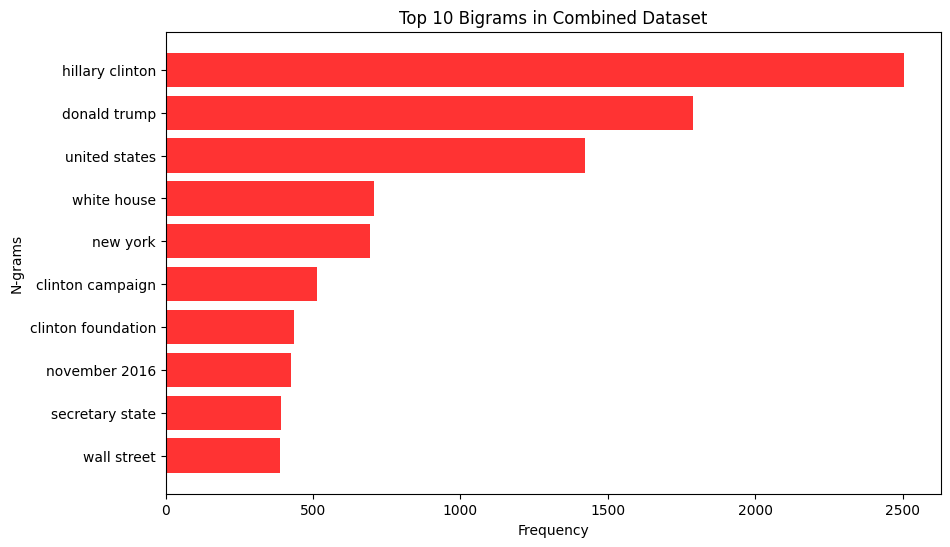

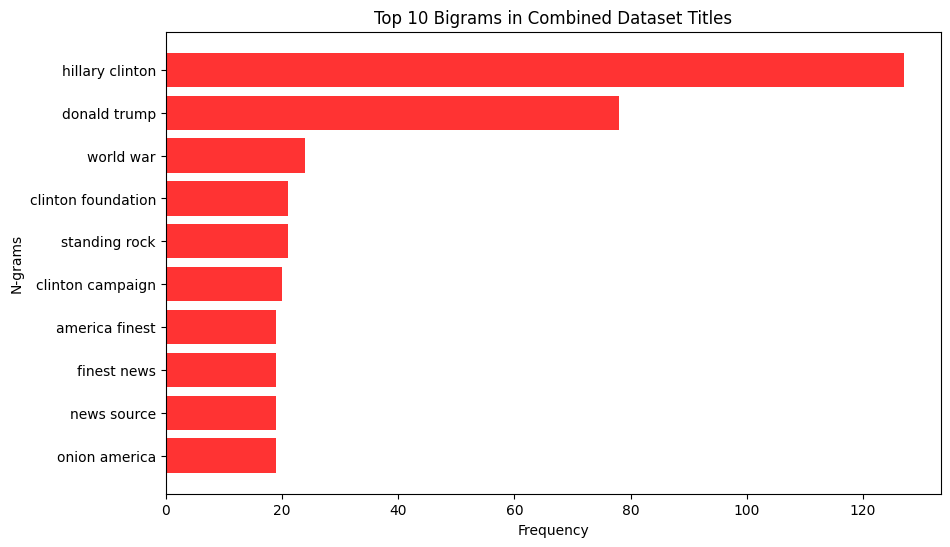

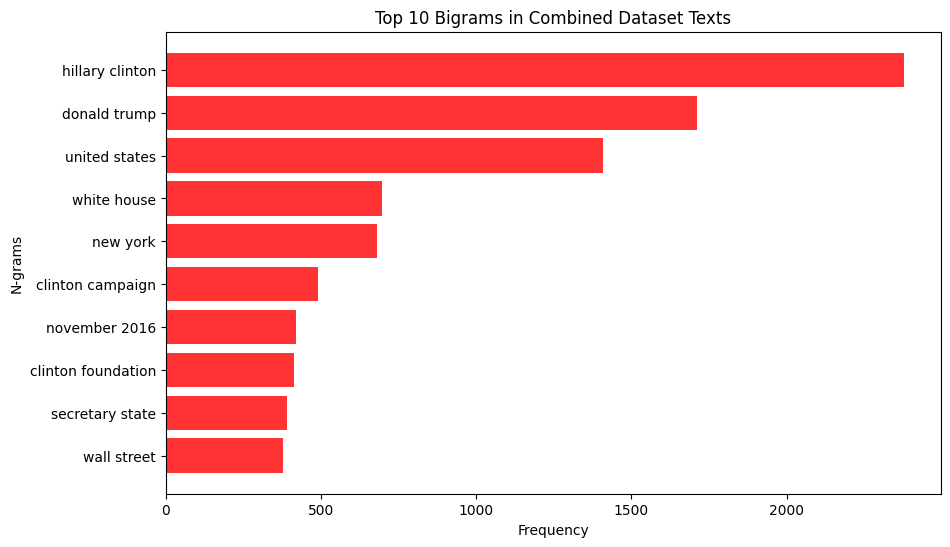

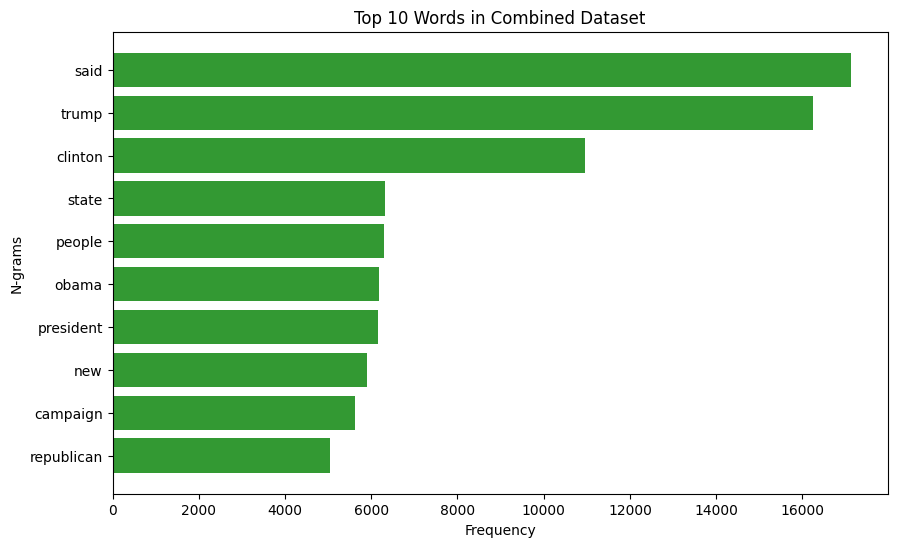

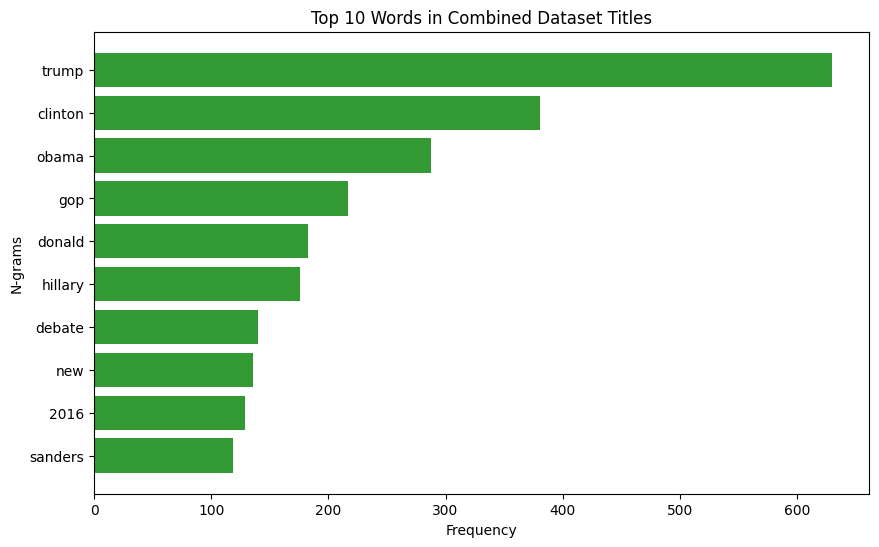

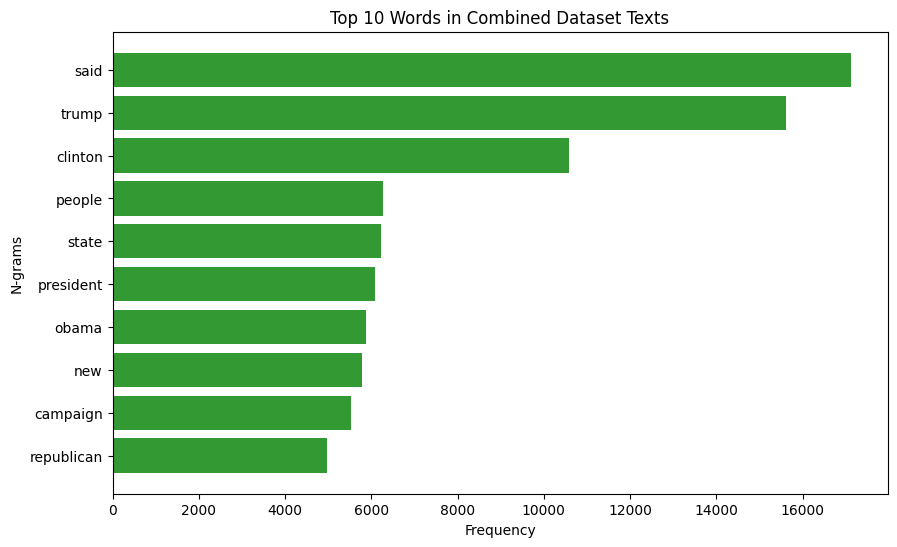

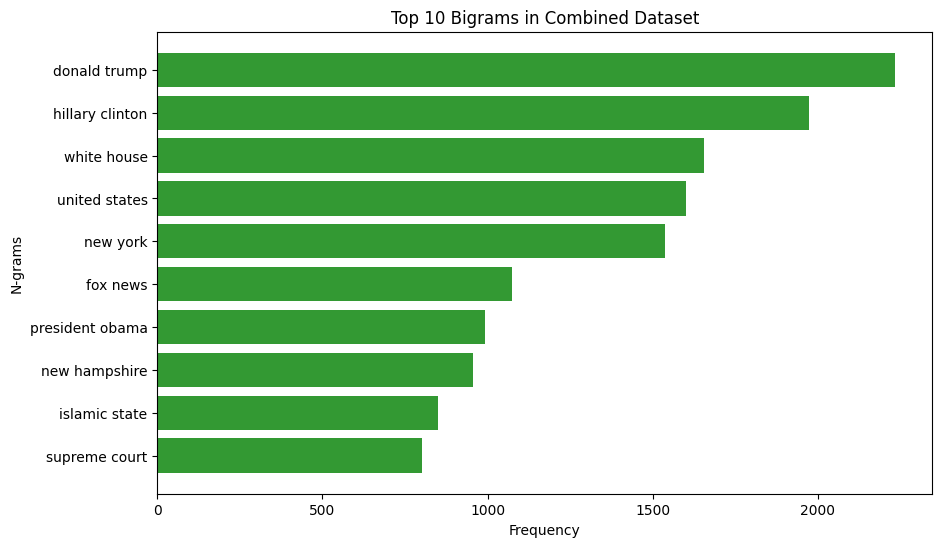

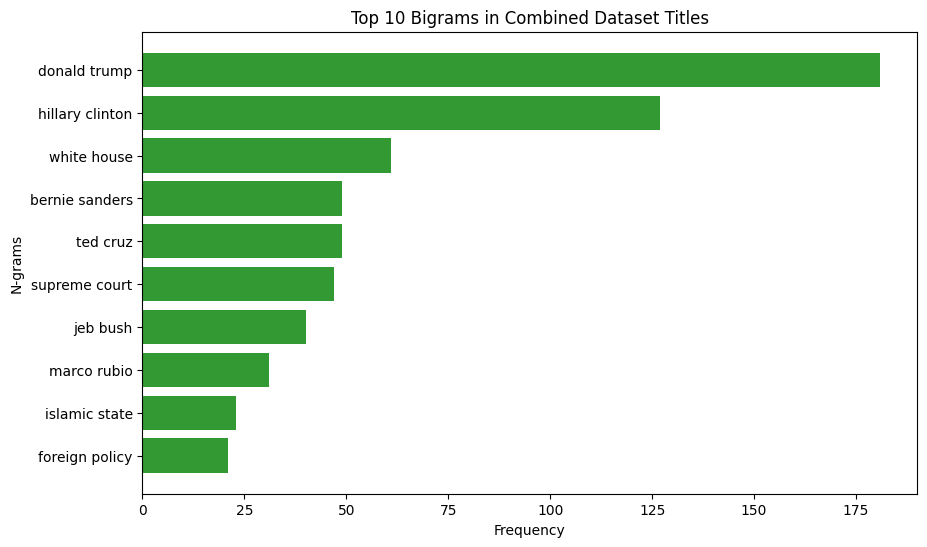

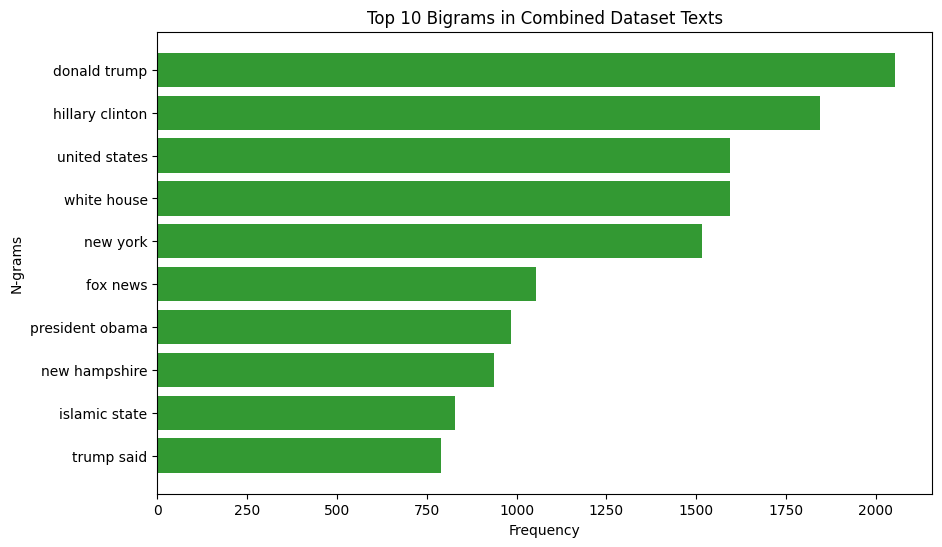

In [17]:
fake_data['combined_text'] = fake_data['title'] + " " + fake_data['text']
true_data['combined_text'] = true_data['title'] + " " + true_data['text']

plot_top_ngrams(fake_data['combined_text'], ngram_range=(1, 1), top_n=10, title="Top 10 Words in Combined Dataset", color='red')

plot_top_ngrams(fake_data['title'], ngram_range=(1, 1), top_n=10, title="Top 10 Words in Combined Dataset Titles", color='red')

plot_top_ngrams(fake_data['text'], ngram_range=(1, 1), top_n=10, title="Top 10 Words in Combined Dataset Texts", color='red')

plot_top_ngrams(fake_data['combined_text'], ngram_range=(2, 2), top_n=10, title="Top 10 Bigrams in Combined Dataset", color='red')

plot_top_ngrams(fake_data['title'], ngram_range=(2, 2), top_n=10, title="Top 10 Bigrams in Combined Dataset Titles", color='red')

plot_top_ngrams(fake_data['text'], ngram_range=(2, 2), top_n=10, title="Top 10 Bigrams in Combined Dataset Texts", color='red')


plot_top_ngrams(true_data['combined_text'], ngram_range=(1, 1), top_n=10, title="Top 10 Words in Combined Dataset", color='green')

plot_top_ngrams(true_data['title'], ngram_range=(1, 1), top_n=10, title="Top 10 Words in Combined Dataset Titles", color='green')

plot_top_ngrams(true_data['text'], ngram_range=(1, 1), top_n=10, title="Top 10 Words in Combined Dataset Texts", color='green')

plot_top_ngrams(true_data['combined_text'], ngram_range=(2, 2), top_n=10, title="Top 10 Bigrams in Combined Dataset", color='green')

plot_top_ngrams(true_data['title'], ngram_range=(2, 2), top_n=10, title="Top 10 Bigrams in Combined Dataset Titles", color='green')

plot_top_ngrams(true_data['text'], ngram_range=(2, 2), top_n=10, title="Top 10 Bigrams in Combined Dataset Texts", color='green')

## Sentiment Analysis

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

nltk.download('vader_lexicon')

vader_analyzer = SentimentIntensityAnalyzer()

combined_data['title_sentiment'] = combined_data['title'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])
combined_data['text_sentiment'] = combined_data['text'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])

combined_data['title_polarity'] = combined_data['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
combined_data['title_subjectivity'] = combined_data['title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
combined_data['text_polarity'] = combined_data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
combined_data['text_subjectivity'] = combined_data['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

combined_data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RoG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,title,text,label,text_length,word_count,combined_text,title_sentiment,text_sentiment,title_polarity,title_subjectivity,text_polarity,text_subjectivity
0,6026,"Whether Clinton or Trump, Tensions Will Escala...",by Jerri-Lynn Scofield \nJerri-Lynn here: Ther...,0,16006,2843,"Whether Clinton or Trump, Tensions Will Escala...",-0.4019,-0.9974,0.0,0.0,0.063459,0.452565
1,1553,"If this is what a “Rubio surge” looks like, Re...","On one hand, it is yet another example of how ...",1,4001,669,"If this is what a “Rubio surge” looks like, Re...",-0.2449,0.9886,0.2,0.2,0.089478,0.445733
2,2581,Boehner moves to push off immigration fight to...,House Speaker John Boehner announced plans Tue...,1,2490,391,Boehner moves to push off immigration fight to...,-0.3818,-0.3071,0.0,0.0,0.020486,0.400302
3,9374,Police Depts. Paid AT&T Millions To Scrutinize...,"Edmondo Burr in News , US // 0 Comments Adam...",0,10786,1812,Police Depts. Paid AT&T Millions To Scrutinize...,0.0000,0.9970,0.0,0.0,0.058552,0.455984
4,4448,Poll: 6 in 10 Back Renewal of NSA Data Collection,With the provisions of the Patriot Act which a...,1,2947,508,Poll: 6 in 10 Back Renewal of NSA Data Collect...,0.0000,-0.9058,0.0,0.0,0.096714,0.385200


In [19]:
combined_data['title_sentiment_label'] = combined_data['title_sentiment'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

combined_data['text_sentiment_label'] = combined_data['text_sentiment'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

combined_data['title_polarity_label'] = combined_data['title_polarity'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

combined_data['text_polarity_label'] = combined_data['text_polarity'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)


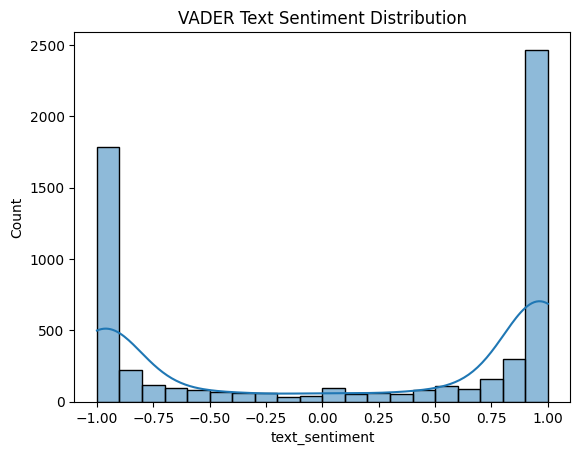

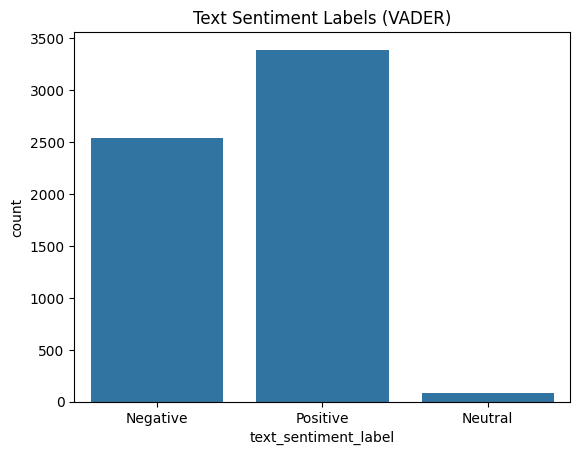

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(combined_data['text_sentiment'], bins=20, kde=True)
plt.title('VADER Text Sentiment Distribution')
plt.show()

sns.countplot(x='text_sentiment_label', data=combined_data)
plt.title('Text Sentiment Labels (VADER)')
plt.show()


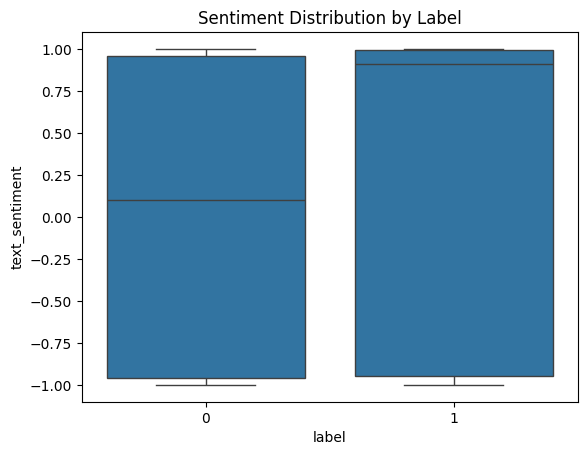

In [21]:
sns.boxplot(x='label', y='text_sentiment', data=combined_data)
plt.title('Sentiment Distribution by Label')
plt.show()


In [22]:
from scipy.stats import ttest_ind

fake_sentiment = combined_data[combined_data['label'] == 0]['text_sentiment']
real_sentiment = combined_data[combined_data['label'] == 1]['text_sentiment']

t_stat, p_value = ttest_ind(fake_sentiment, real_sentiment)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.2e}")


T-statistic: -9.84, P-value: 1.13e-22


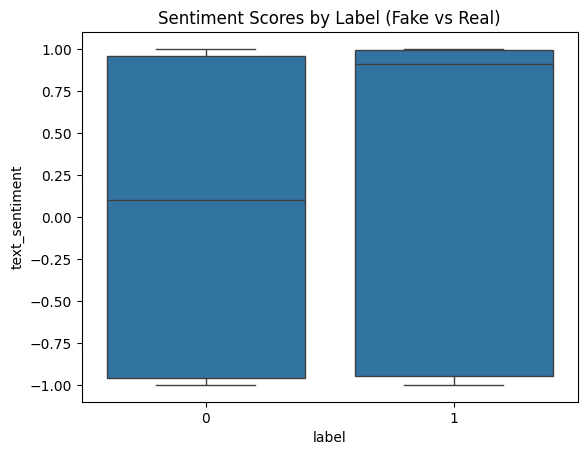

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='label', y='text_sentiment', data=combined_data)
plt.title('Sentiment Scores by Label (Fake vs Real)')
plt.show()


In [24]:
import nltk
from gensim.models import Word2Vec
nltk.download('punkt')

combined_data['title_tokens'] = combined_data['title'].apply(nltk.word_tokenize)
combined_data['text_tokens'] = combined_data['text'].apply(nltk.word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RoG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
all_tokens = combined_data['title_tokens'].tolist() + combined_data['text_tokens'].tolist()
word2vec_model = Word2Vec(sentences=all_tokens, vector_size=100, window=5, min_count=2, workers=4)

word2vec_model.save("word2vec.model")


In [26]:
import numpy as np

def get_average_word2vec(tokens, model, vector_size):
    valid_tokens = [token for token in tokens if token in model.wv]
    if valid_tokens:
        return np.mean(model.wv[valid_tokens], axis=0)
    else:
        return np.zeros(vector_size)

combined_data['title_embedding'] = combined_data['title_tokens'].apply(lambda x: get_average_word2vec(x, word2vec_model, 100))
combined_data['text_embedding'] = combined_data['text_tokens'].apply(lambda x: get_average_word2vec(x, word2vec_model, 100))


In [27]:
title_embeddings = np.vstack(combined_data['title_embedding'].values)
text_embeddings = np.vstack(combined_data['text_embedding'].values)

sentiment_features = combined_data[['title_sentiment', 'text_sentiment', 'title_polarity', 'text_polarity', 'title_subjectivity', 'text_subjectivity']].values

X = np.hstack((title_embeddings, text_embeddings, sentiment_features))
y = combined_data['label']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\xgboost\core.py:158: UserWarning: [18:55:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9217970049916805
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       577
           1       0.93      0.92      0.92       625

    accuracy                           0.92      1202
   macro avg       0.92      0.92      0.92      1202
weighted avg       0.92      0.92      0.92      1202



[[535  42]
 [ 52 573]]


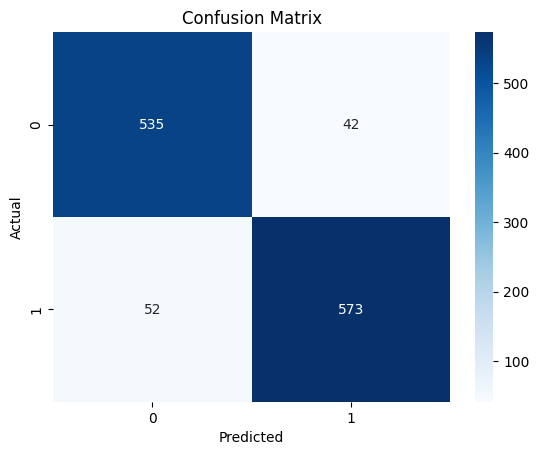

In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x800 with 0 Axes>

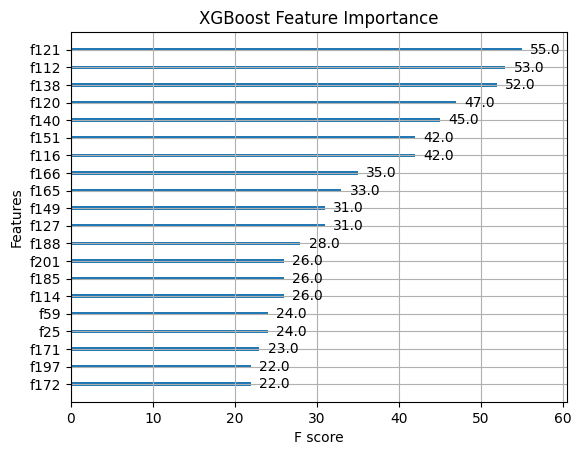

In [31]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=20)
plt.title("XGBoost Feature Importance")
plt.show()


Precision: 0.93
Recall: 0.92
F1 Score: 0.92


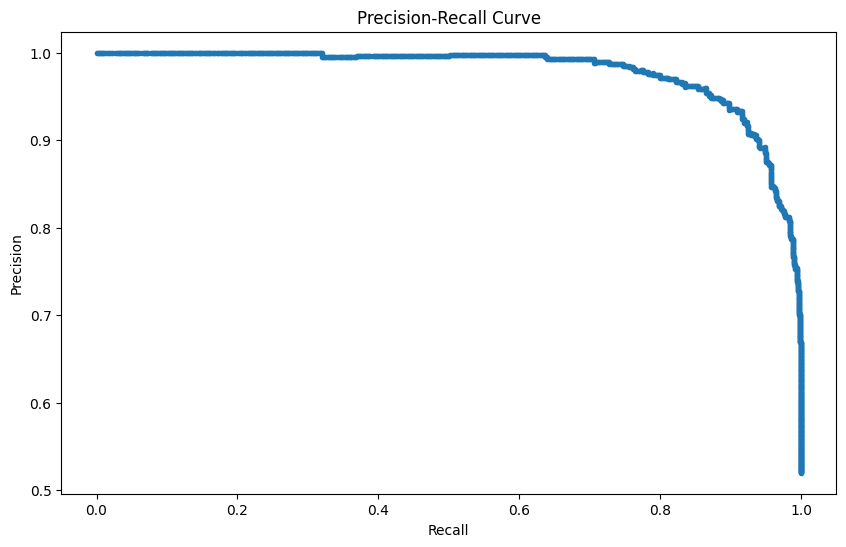

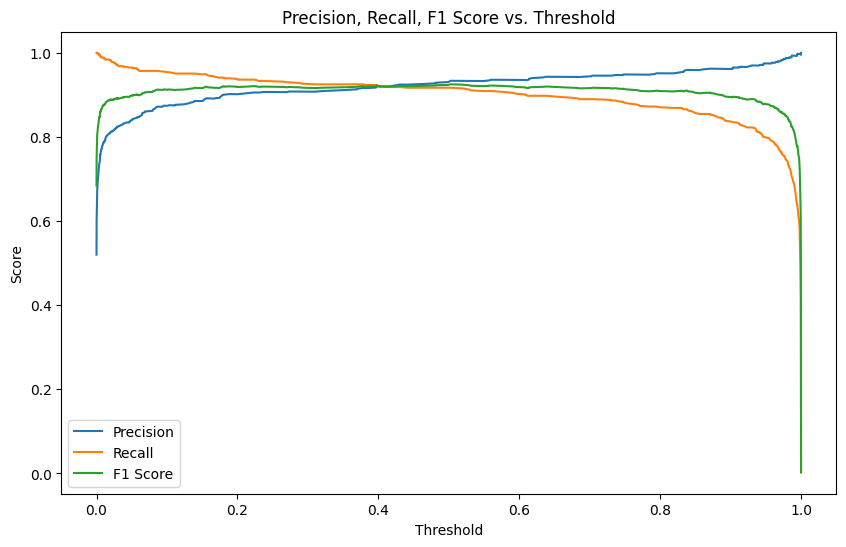

In [32]:
# precission recall f1 score

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")

print(f"Recall: {recall:.2f}")

print(f"F1 Score: {f1_score:.2f}")

# plot precision recall f1 score

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# plot f1 recall precission

plt.figure(figsize=(10, 6))

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]), label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score vs. Threshold')
plt.legend()
plt.show()




In [33]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgboost_fake_news_model.pkl')

# Load the model
loaded_model = joblib.load('xgboost_fake_news_model.pkl')


### Only Sentiment Features

In [22]:
sentiment_features = combined_data[['title_sentiment', 'text_sentiment', 'title_polarity', 'text_polarity', 'title_subjectivity', 'text_subjectivity']].values
feature_names = ['title_sentiment', 'text_sentiment', 'title_polarity', 'text_polarity', 'title_subjectivity', 'text_subjectivity']

X = sentiment_features
y = combined_data['label']


In [23]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)  

print(f"Training set size: {len(X_train)} ({len(X_train) / len(X):.2%})")
print(f"Validation set size: {len(X_val)} ({len(X_val) / len(X):.2%})")
print(f"Test set size: {len(X_test)} ({len(X_test) / len(X):.2%})")


Training set size: 4808 (80.00%)
Validation set size: 601 (10.00%)
Test set size: 601 (10.00%)


In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[0]	validation_0-logloss:0.65614	validation_1-logloss:0.67192


[1]	validation_0-logloss:0.63454	validation_1-logloss:0.66145
[2]	validation_0-logloss:0.61847	validation_1-logloss:0.65636
[3]	validation_0-logloss:0.60748	validation_1-logloss:0.65216
[4]	validation_0-logloss:0.59688	validation_1-logloss:0.65420
[5]	validation_0-logloss:0.58640	validation_1-logloss:0.65317
[6]	validation_0-logloss:0.58060	validation_1-logloss:0.65439
[7]	validation_0-logloss:0.57309	validation_1-logloss:0.65393
[8]	validation_0-logloss:0.56782	validation_1-logloss:0.65477
[9]	validation_0-logloss:0.56464	validation_1-logloss:0.65537
[10]	validation_0-logloss:0.55836	validation_1-logloss:0.65540
[11]	validation_0-logloss:0.55386	validation_1-logloss:0.65745
[12]	validation_0-logloss:0.54667	validation_1-logloss:0.65617
[13]	validation_0-logloss:0.54026	validation_1-logloss:0.65747
[14]	validation_0-logloss:0.53847	validation_1-logloss:0.65900
[15]	validation_0-logloss:0.53358	validation_1-logloss:0.65966
[16]	validation_0-logloss:0.52821	validation_1-logloss:0.65961
[

c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\xgboost\core.py:158: UserWarning: [20:57:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[93]	validation_0-logloss:0.33276	validation_1-logloss:0.72098
[94]	validation_0-logloss:0.33115	validation_1-logloss:0.71967
[95]	validation_0-logloss:0.33048	validation_1-logloss:0.72051
[96]	validation_0-logloss:0.32917	validation_1-logloss:0.72135
[97]	validation_0-logloss:0.32751	validation_1-logloss:0.71974
[98]	validation_0-logloss:0.32505	validation_1-logloss:0.72013
[99]	validation_0-logloss:0.32345	validation_1-logloss:0.72166
Accuracy: 0.6023294509151415
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.66      0.62       293
           1       0.63      0.55      0.58       308

    accuracy                           0.60       601
   macro avg       0.61      0.60      0.60       601
weighted avg       0.61      0.60      0.60       601



[[194  99]
 [140 168]]


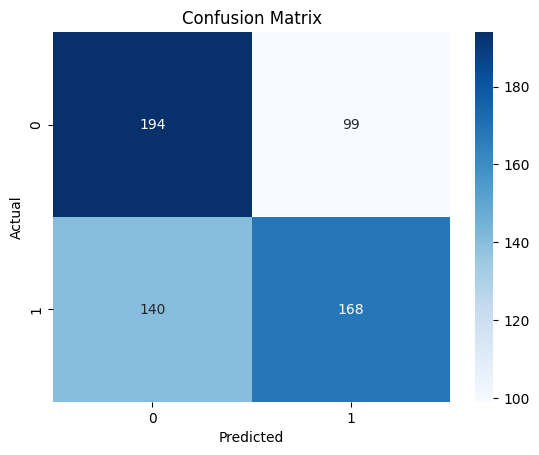

In [26]:
# confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x800 with 0 Axes>

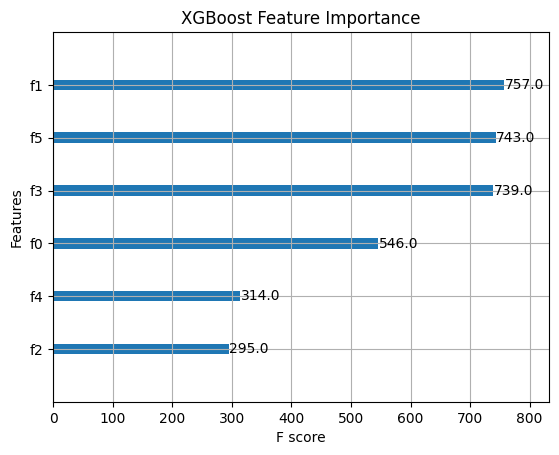

In [27]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=20)
plt.title("XGBoost Feature Importance")
plt.show()


Precision: 0.63
Recall: 0.55
F1 Score: 0.58


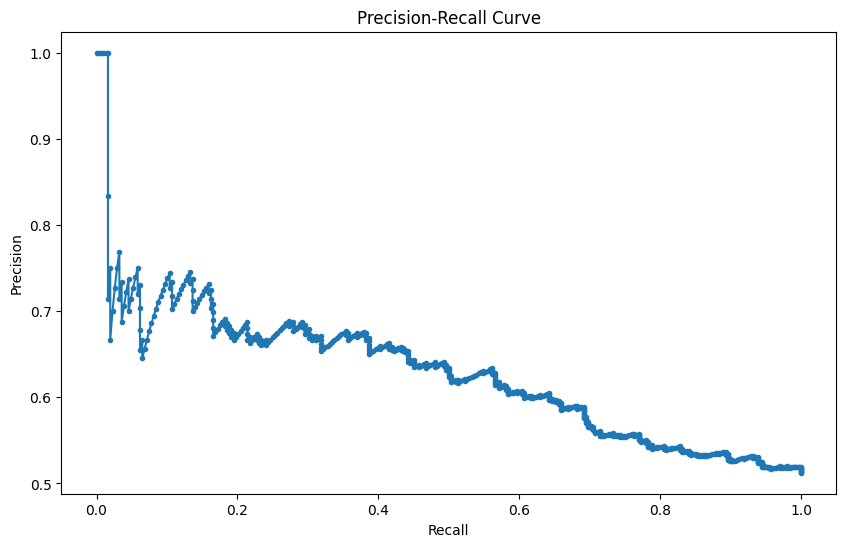

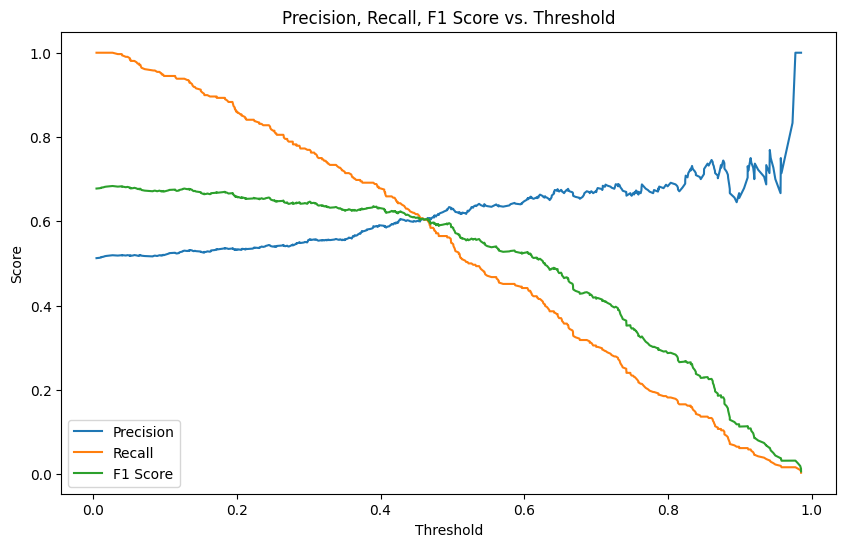

In [29]:
# precission recall f1 score

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")

print(f"Recall: {recall:.2f}")

print(f"F1 Score: {f1_score:.2f}")

# plot precision recall f1 score

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# plot f1 recall precission

plt.figure(figsize=(10, 6))

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]), label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score vs. Threshold')
plt.legend()
plt.show()




In [30]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgboost_fake_news_model_only_sentiment.pkl')

# Load the model
loaded_model = joblib.load('xgboost_fake_news_model_only_sentiment.pkl')


### Random Forest Sentiment Only

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

combined_data['sentiment_variance'] = combined_data['text_sentiment'].rolling(window=5).std().fillna(0)

X_sentiment = combined_data[['title_sentiment', 'text_sentiment', 'title_polarity', 
                             'text_polarity', 'title_subjectivity', 'text_subjectivity', 'sentiment_variance']].values
y = combined_data['label']

X_train, X_test, y_train, y_test = train_test_split(X_sentiment, y, test_size=0.2, random_state=42)

param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6148086522462562
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.77      0.66       577
           1       0.69      0.47      0.56       625

    accuracy                           0.61      1202
   macro avg       0.63      0.62      0.61      1202
weighted avg       0.63      0.61      0.61      1202



Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.6131447587354409
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.63       605
           1       0.62      0.58      0.60       597

    accuracy                           0.61      1202
   macro avg       0.61      0.61      0.61      1202
weighted avg       0.61      0.61      0.61      1202



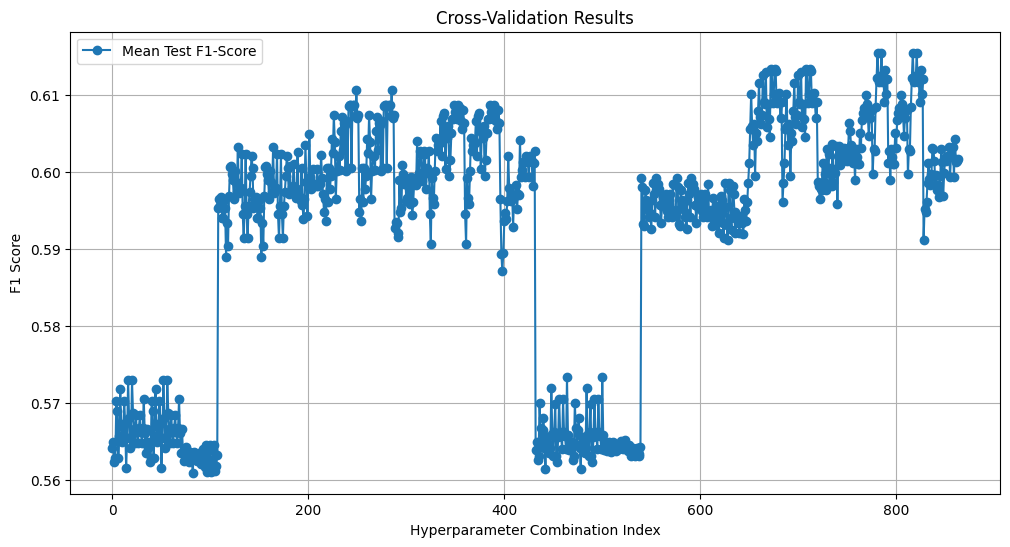

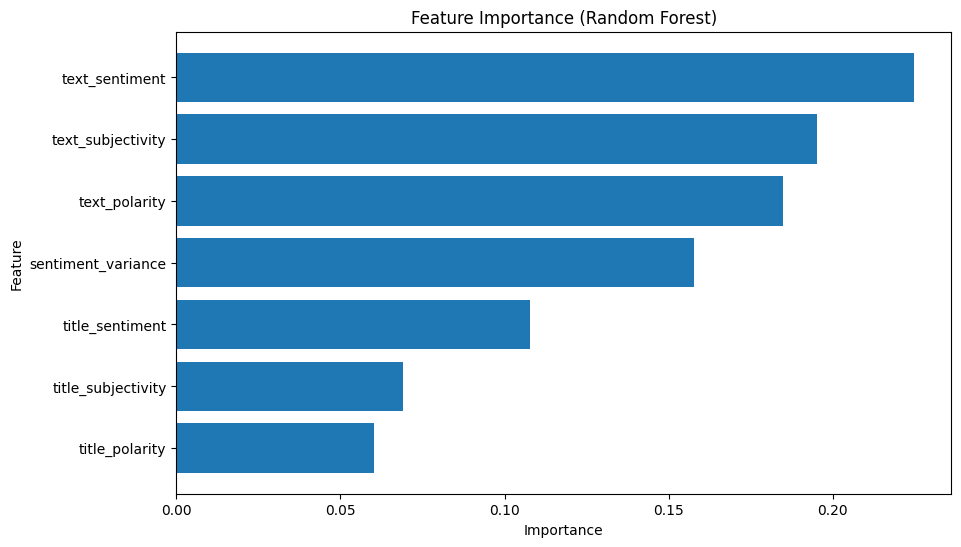

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Refined feature set: Only sentiment and subjectivity features
X_sentiment = combined_data[['title_sentiment', 'text_sentiment', 
                             'title_polarity', 'text_polarity', 
                             'title_subjectivity', 'text_subjectivity', 
                             'sentiment_variance']].values
y = combined_data['label']

# Scale features
scaler = StandardScaler()
X_sentiment_scaled = scaler.fit_transform(X_sentiment)

# Stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X_sentiment_scaled, y, 
                                                    test_size=0.2, random_state=42, stratify=y)

# Expanded hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Control number of features considered for splitting
    'criterion': ['gini', 'entropy']        # Experiment with splitting criteria
}

# Random Forest model with GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluate on test set
y_pred = grid_search.best_estimator_.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(12, 6))
plt.plot(cv_results['mean_test_score'], label='Mean Test F1-Score', marker='o')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('F1 Score')
plt.title('Cross-Validation Results')
plt.legend()
plt.grid(True)
plt.show()

# Feature importance analysis
feature_names = ['title_sentiment', 'text_sentiment', 
                 'title_polarity', 'text_polarity', 
                 'title_subjectivity', 'text_subjectivity', 
                 'sentiment_variance']
feature_importances = grid_search.best_estimator_.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


### NN With Only Sentiment

In [51]:
import numpy as np

# Reshape for CNN or RNN input
X_train_reshaped = X_train[:, :, np.newaxis]  # Reshape to (samples, features, 1)
X_test_reshaped = X_test[:, :, np.newaxis]


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build a simple CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = cnn_model.fit(X_train_reshaped, y_train, 
                        validation_data=(X_test_reshaped, y_test), 
                        epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test)
print(f"CNN Test Accuracy: {cnn_accuracy:.2f}")


Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5375 - loss: 0.6850 - val_accuracy: 0.5998 - val_loss: 0.6727
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5674 - loss: 0.6791 - val_accuracy: 0.5899 - val_loss: 0.6724
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5931 - loss: 0.6721 - val_accuracy: 0.5957 - val_loss: 0.6723
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5768 - loss: 0.6720 - val_accuracy: 0.5882 - val_loss: 0.6711
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5785 - loss: 0.6667 - val_accuracy: 0.5840 - val_loss: 0.6720
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5895 - loss: 0.6665 - val_accuracy: 0.5857 - val_loss: 0.6718
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5914 - loss: 0.6673 - val_accuracy: 0.5923 - val_loss: 0.6704
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5934 - loss: 0.6656 - val_accuracy: 0.

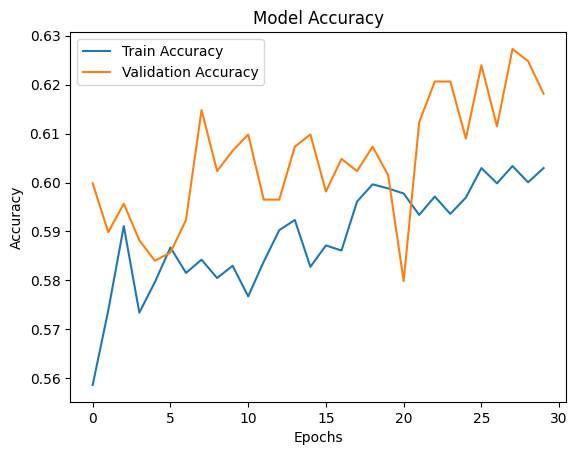

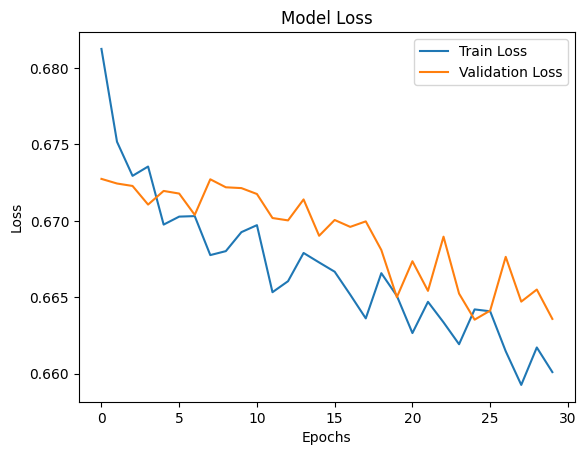

In [56]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build an RNN model with LSTM
rnn_model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(X_train_reshaped.shape[1], 1)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = rnn_model.fit(X_train_reshaped, y_train, 
                        validation_data=(X_test_reshaped, y_test), 
                        epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_reshaped, y_test)
print(f"RNN Test Accuracy: {rnn_accuracy:.2f}")


Epoch 1/50


c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5384 - loss: 0.6916 - val_accuracy: 0.5890 - val_loss: 0.6873
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5465 - loss: 0.6890 - val_accuracy: 0.5666 - val_loss: 0.6809
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5620 - loss: 0.6828 - val_accuracy: 0.5799 - val_loss: 0.6788
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5542 - loss: 0.6852 - val_accuracy: 0.5582 - val_loss: 0.6790
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5623 - loss: 0.6820 - val_accuracy: 0.5940 - val_loss: 0.6764
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5672 - loss: 0.6803 - val_accuracy: 0.5724 - val_loss: 0.6768
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5635 - loss: 0.6788 - val_accuracy: 0.5915 - val_loss: 0.6740
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5538 - loss: 0.6800 - val_accuracy: 0.5865 - val_

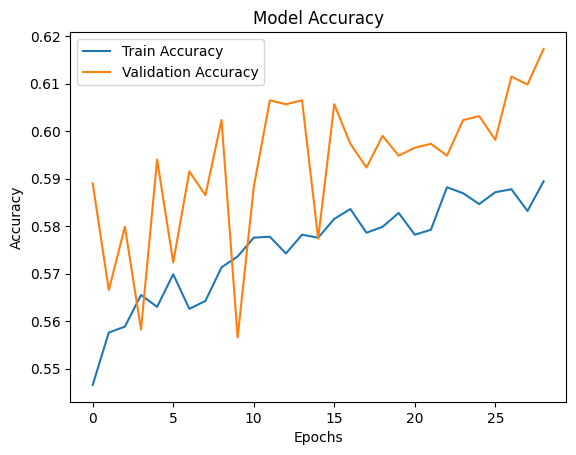

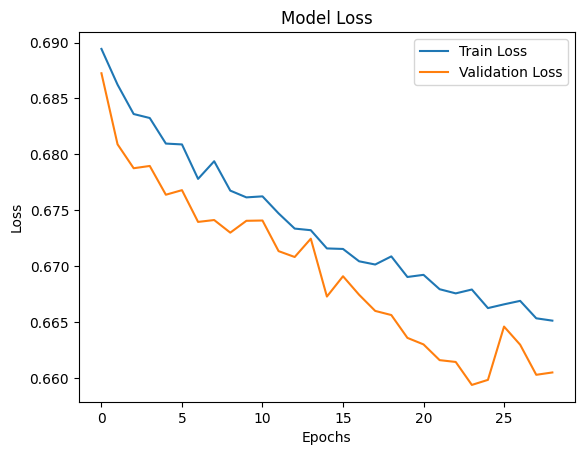

In [54]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Only Text Features

In [35]:
X = text_embeddings
y = combined_data['label']


In [36]:
from sklearn.model_selection import train_test_split

# First split: 90% Training + Validation and 10% Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Second split: 80% Training and 10% Validation (from the 90%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)  # 10% of 90% = ~10%

# Print sizes of the splits
print(f"Training set size: {len(X_train)} ({len(X_train) / len(X):.2%})")
print(f"Validation set size: {len(X_val)} ({len(X_val) / len(X):.2%})")
print(f"Test set size: {len(X_test)} ({len(X_test) / len(X):.2%})")


Training set size: 4808 (80.00%)
Validation set size: 601 (10.00%)
Test set size: 601 (10.00%)


In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[0]	validation_0-logloss:0.52329	validation_1-logloss:0.54432
[1]	validation_0-logloss:0.41993	validation_1-logloss:0.46352
[2]	validation_0-logloss:0.35165	validation_1-logloss:0.40853
[3]	validation_0-logloss:0.29941	validation_1-logloss:0.36786
[4]	validation_0-logloss:0.25991	validation_1-logloss:0.34158
[5]	validation_0-logloss:0.22862	validation_1-logloss:0.32648
[6]	validation_0-logloss:0.20334	validation_1-logloss:0.30654
[7]	validation_0-logloss:0.18168	validation_1-logloss:0.29264
[8]	validation_0-logloss:0.16637	validation_1-logloss:0.28233
[9]	validation_0-logloss:0.15314	validation_1-logloss:0.27275
[10]	validation_0-logloss:0.13912	validation_1-logloss:0.26928
[11]	validation_0-logloss:0.12569	validation_1-logloss:0.26034
[12]	validation_0-logloss:0.11664	validation_1-logloss:0.25523
[13]	validation_0-logloss:0.10640	validation_1-logloss:0.25146
[14]	validation_0-logloss:0.09797	validation_1-logloss:0.24590
[15]	validation_0-logloss:0.09003	validation_1-logloss:0.24372
[1

c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\xgboost\core.py:158: UserWarning: [21:21:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[20]	validation_0-logloss:0.06410	validation_1-logloss:0.23912
[21]	validation_0-logloss:0.05971	validation_1-logloss:0.23819
[22]	validation_0-logloss:0.05678	validation_1-logloss:0.23719
[23]	validation_0-logloss:0.05433	validation_1-logloss:0.23398
[24]	validation_0-logloss:0.05144	validation_1-logloss:0.23293
[25]	validation_0-logloss:0.04839	validation_1-logloss:0.23225
[26]	validation_0-logloss:0.04552	validation_1-logloss:0.23459
[27]	validation_0-logloss:0.04227	validation_1-logloss:0.23234
[28]	validation_0-logloss:0.03975	validation_1-logloss:0.23159
[29]	validation_0-logloss:0.03839	validation_1-logloss:0.22959
[30]	validation_0-logloss:0.03714	validation_1-logloss:0.22895
[31]	validation_0-logloss:0.03486	validation_1-logloss:0.23052
[32]	validation_0-logloss:0.03302	validation_1-logloss:0.22789
[33]	validation_0-logloss:0.03175	validation_1-logloss:0.22796
[34]	validation_0-logloss:0.03004	validation_1-logloss:0.22886
[35]	validation_0-logloss:0.02852	validation_1-logloss:

[[263  30]
 [ 34 274]]


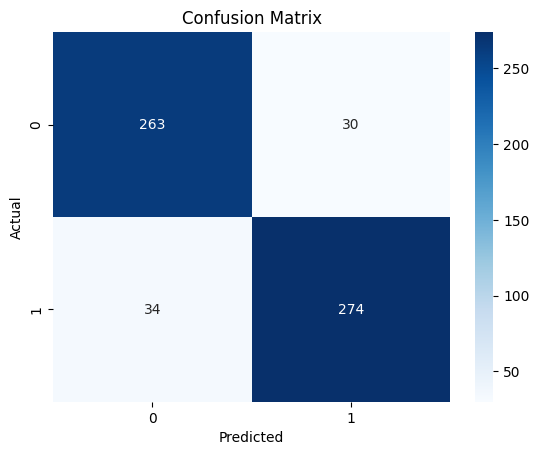

In [39]:
# confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x800 with 0 Axes>

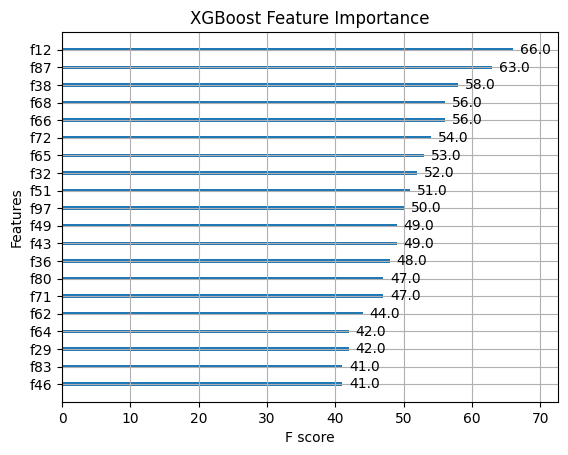

In [40]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=20)
plt.title("XGBoost Feature Importance")
plt.show()


Precision: 0.90
Recall: 0.89
F1 Score: 0.90


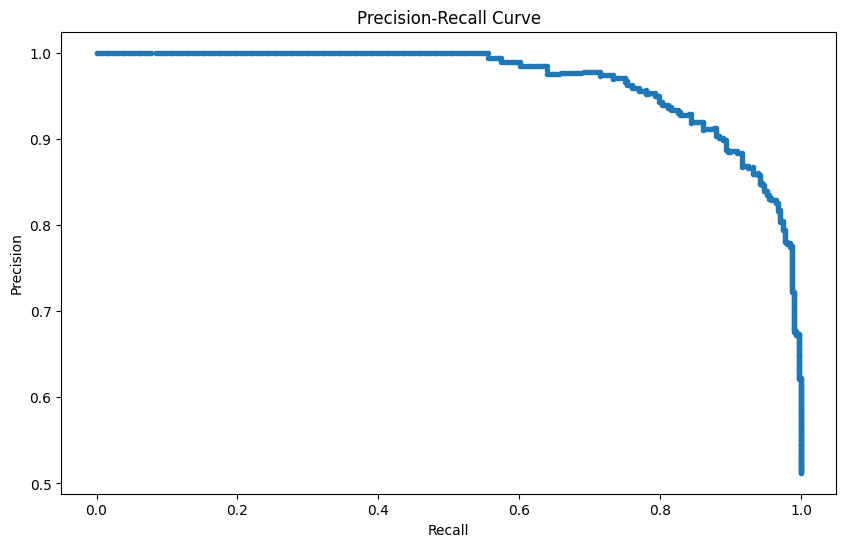

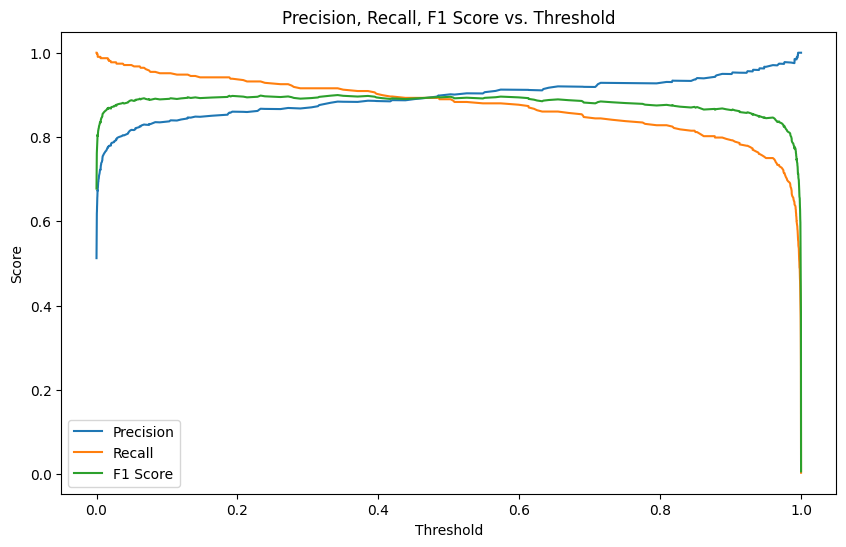

In [42]:
# precission recall f1 score

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")

print(f"Recall: {recall:.2f}")

print(f"F1 Score: {f1_score:.2f}")

# plot precision recall f1 score

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# plot f1 recall precission

plt.figure(figsize=(10, 6))

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]), label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score vs. Threshold')
plt.legend()
plt.show()




In [43]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgboost_fake_news_model_only_text.pkl')

# Load the model
loaded_model = joblib.load('xgboost_fake_news_model_only_text.pkl')


### More Complex Preprocessing

In [61]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

nltk.download('vader_lexicon')

vader_analyzer = SentimentIntensityAnalyzer()

combined_data['title_cleaned'] = combined_data['title'].apply(preprocess_text_to_string)
combined_data['text_cleaned'] = combined_data['text'].apply(preprocess_text_to_string)

combined_data['title_sentiment'] = combined_data['title_cleaned'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])
combined_data['text_sentiment'] = combined_data['text_cleaned'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])

combined_data['title_polarity'] = combined_data['title_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)
combined_data['title_subjectivity'] = combined_data['title_cleaned'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
combined_data['text_polarity'] = combined_data['text_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)
combined_data['text_subjectivity'] = combined_data['text_cleaned'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

combined_data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RoG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,title,text,label,title_sentiment,text_sentiment,title_polarity,title_subjectivity,text_polarity,text_subjectivity,...,text_polarity_label,title_tokens,text_tokens,title_embedding,text_embedding,sentiment_variance,word_count,punctuation_count,title_cleaned,text_cleaned
0,6026,"Whether Clinton or Trump, Tensions Will Escala...",by Jerri-Lynn Scofield \nJerri-Lynn here: Ther...,0,-0.3182,-0.9923,0.0,0.0,0.032677,0.455146,...,Positive,"[Whether, Clinton, or, Trump, ,, Tensions, Wil...","[by, Jerri-Lynn, Scofield, Jerri-Lynn, here, :...","[-0.72342336, 0.0047616363, -0.15822232, -0.73...","[-0.7958293, -0.49314293, -0.5340818, 0.252654...",0.000000,2843,15,whether clinton trump tension escalate china r...,jerrilynn scofield jerrilynn many reason despa...
1,1553,"If this is what a “Rubio surge” looks like, Re...","On one hand, it is yet another example of how ...",1,-0.2484,0.9757,0.2,0.2,0.083284,0.443857,...,Positive,"[If, this, is, what, a, “, Rubio, surge, ”, lo...","[On, one, hand, ,, it, is, yet, another, examp...","[-0.61881244, 0.040648762, -0.03814984, 0.6884...","[-0.663525, -0.5249997, -0.45844775, 0.0460925...",0.000000,669,2,rubio surge look like republican really screwed,one hand yet another example rubio despite pol...
2,2581,Boehner moves to push off immigration fight to...,House Speaker John Boehner announced plans Tue...,1,-0.3818,-0.6597,0.0,0.0,0.002925,0.348796,...,Positive,"[Boehner, moves, to, push, off, immigration, f...","[House, Speaker, John, Boehner, announced, pla...","[-1.2878729, -0.18308553, 0.35820484, -0.53628...","[-0.44771817, -0.52706355, -0.32575187, -0.342...",0.000000,391,0,boehner move push immigration fight 2015,house speaker john boehner announced plan tues...
3,9374,Police Depts. Paid AT&T Millions To Scrutinize...,"Edmondo Burr in News , US // 0 Comments Adam...",0,0.0000,0.9945,0.0,0.0,0.043121,0.417732,...,Positive,"[Police, Depts, ., Paid, AT, &, T, Millions, T...","[Edmondo, Burr, in, News, ,, US, //, 0, Commen...","[-0.44825876, -0.18951397, -0.85715693, 0.7172...","[-0.64741224, -0.29655507, -0.35500017, 0.1994...",0.000000,1812,12,police depts paid att million scrutinize text ...,edmondo burr news u 0 comment adam schwartz se...
4,4448,Poll: 6 in 10 Back Renewal of NSA Data Collection,With the provisions of the Patriot Act which a...,1,0.0000,-0.9666,0.0,0.0,0.055440,0.313611,...,Positive,"[Poll, :, 6, in, 10, Back, Renewal, of, NSA, D...","[With, the, provisions, of, the, Patriot, Act,...","[0.09833705, -0.46987897, -0.60735726, 0.41626...","[-0.4027284, -0.3912712, -0.40227205, -0.15275...",0.983721,508,1,poll 6 10 back renewal nsa data collection,provision patriot act allow national security ...


In [62]:
combined_data['title_sentiment_label'] = combined_data['title_sentiment'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

combined_data['text_sentiment_label'] = combined_data['text_sentiment'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

combined_data['title_polarity_label'] = combined_data['title_polarity'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

combined_data['text_polarity_label'] = combined_data['text_polarity'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)


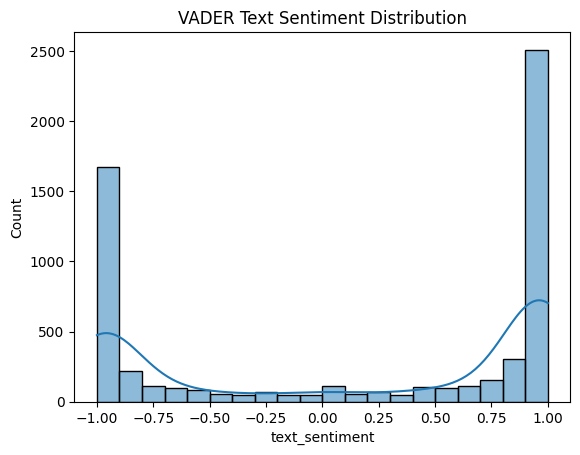

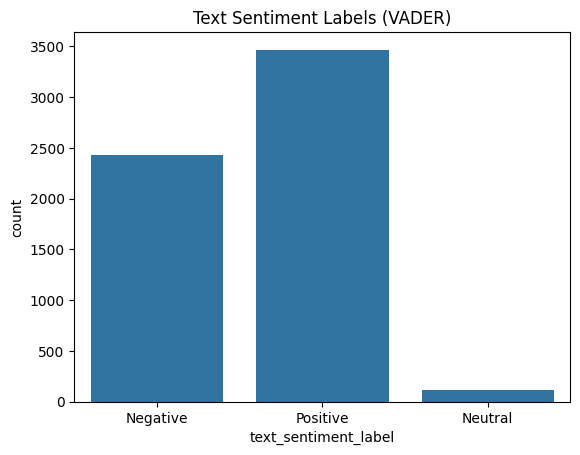

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(combined_data['text_sentiment'], bins=20, kde=True)
plt.title('VADER Text Sentiment Distribution')
plt.show()

sns.countplot(x='text_sentiment_label', data=combined_data)
plt.title('Text Sentiment Labels (VADER)')
plt.show()


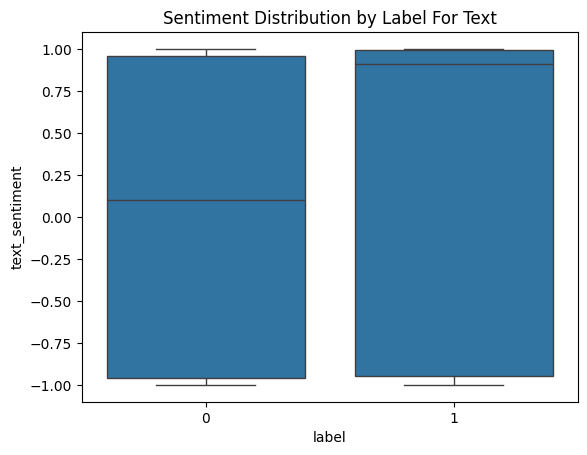

In [136]:
sns.boxplot(x='label', y='text_sentiment', data=combined_data)
plt.title('Sentiment Distribution by Label For Text')
plt.show()


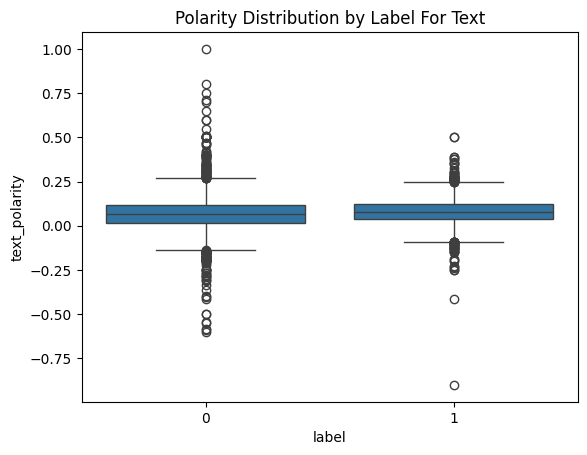

In [137]:
sns.boxplot(x='label', y='text_polarity', data=combined_data)
plt.title('Polarity Distribution by Label For Text')
plt.show()


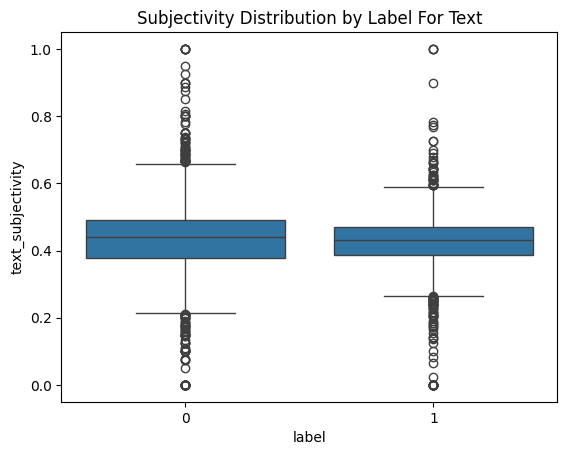

In [142]:
sns.boxplot(x='label', y='text_subjectivity', data=combined_data)
plt.title('Subjectivity Distribution by Label For Text')
plt.show()


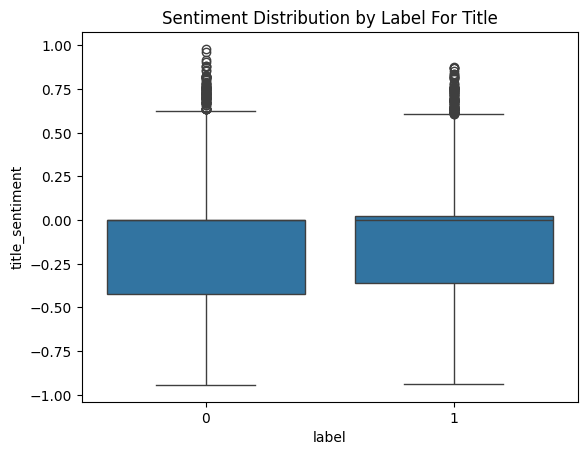

In [138]:
sns.boxplot(x='label', y='title_sentiment', data=combined_data)
plt.title('Sentiment Distribution by Label For Title')
plt.show()


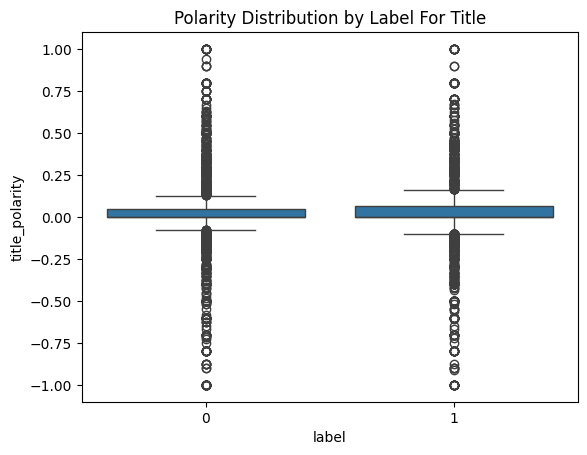

In [139]:
sns.boxplot(x='label', y='title_polarity', data=combined_data)
plt.title('Polarity Distribution by Label For Title')
plt.show()


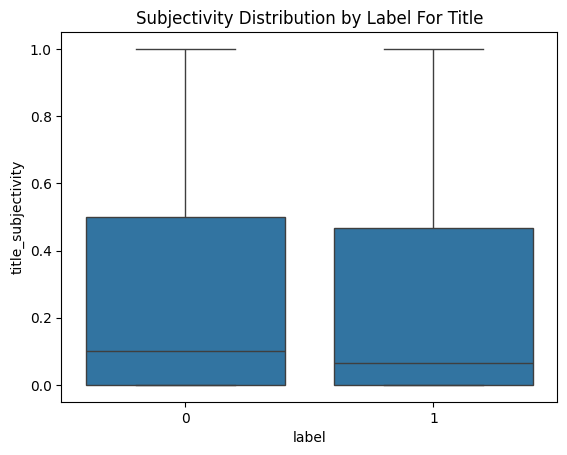

In [143]:
sns.boxplot(x='label', y='title_subjectivity', data=combined_data)
plt.title('Subjectivity Distribution by Label For Title')
plt.show()


In [65]:
from scipy.stats import ttest_ind

fake_sentiment = combined_data[combined_data['label'] == 0]['text_sentiment']
real_sentiment = combined_data[combined_data['label'] == 1]['text_sentiment']

t_stat, p_value = ttest_ind(fake_sentiment, real_sentiment)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.2e}")


T-statistic: -10.08, P-value: 1.07e-23


In [67]:
sentiment_features = combined_data[['title_sentiment', 'text_sentiment', 'title_polarity', 'text_polarity', 'title_subjectivity', 'text_subjectivity']].values

X = sentiment_features
y = combined_data['label']


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6006655574043261
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.61      0.59       577
           1       0.62      0.59      0.61       625

    accuracy                           0.60      1202
   macro avg       0.60      0.60      0.60      1202
weighted avg       0.60      0.60      0.60      1202



c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\xgboost\core.py:158: UserWarning: [04:49:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[351 226]
 [254 371]]


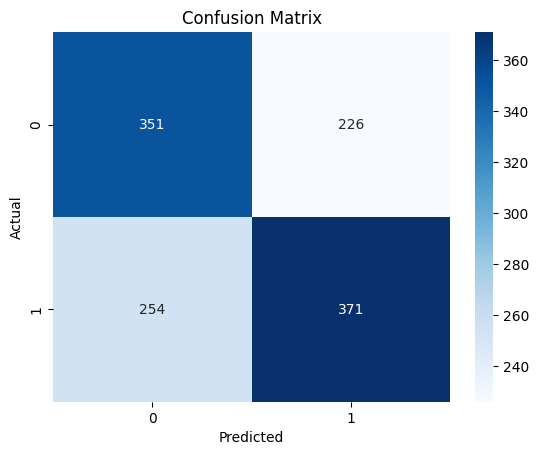

In [70]:
# confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x800 with 0 Axes>

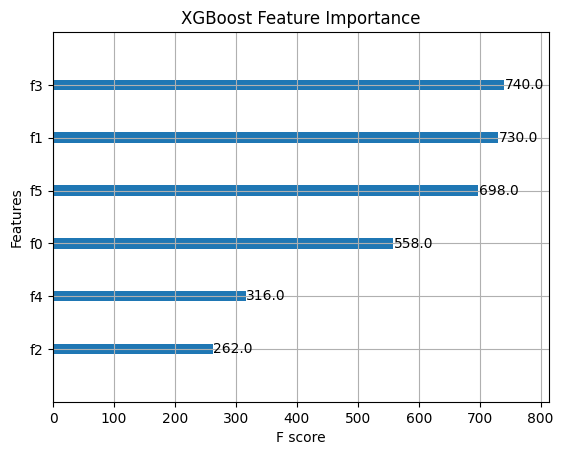

In [71]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=20)
plt.title("XGBoost Feature Importance")
plt.show()


Precision: 0.62
Recall: 0.59
F1 Score: 0.61


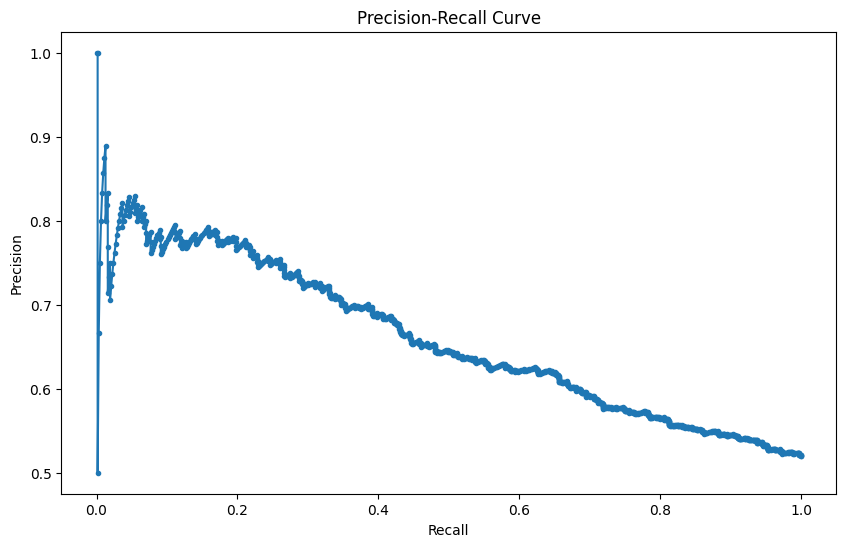

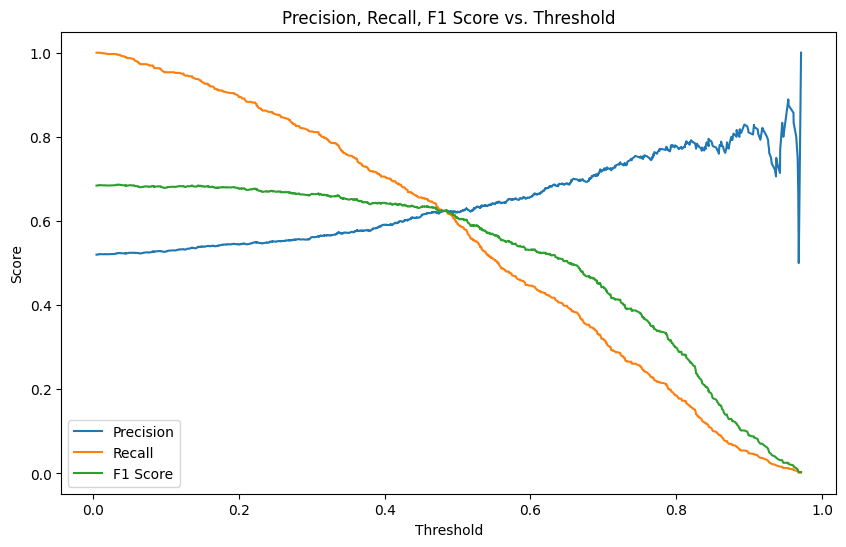

In [72]:
# precission recall f1 score

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")

print(f"Recall: {recall:.2f}")

print(f"F1 Score: {f1_score:.2f}")

# plot precision recall f1 score

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# plot f1 recall precission

plt.figure(figsize=(10, 6))

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]), label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score vs. Threshold')
plt.legend()
plt.show()




### Propaganda

In [46]:
import re
from nltk.corpus import opinion_lexicon
import nltk
nltk.download('opinion_lexicon')

charged_words = set(opinion_lexicon.positive()).union(opinion_lexicon.negative())

def count_charged_words(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return sum(1 for word in words if word in charged_words)


def count_repeated_phrases(text):
    words = re.findall(r'\b\w+\b', text.lower())
    bigrams = list(zip(words, words[1:]))
    return len(bigrams) - len(set(bigrams))

def count_exaggerations(text):
    return len(re.findall(r'\b(always|never|everyone|nobody|nothing|everything)\b', text.lower(), re.IGNORECASE))

def preprocess_text_for_counting(text):
    return re.sub(r'[^\w\s]', '', text.lower())




[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\RoG\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [37]:
import requests

def fetch_propaganda_score(text):
    """
    Fetch propaganda score using the Proppy API.
    Args:
        text (str): The input text/article for which to fetch the propaganda score.
    Returns:
        float: The propaganda score (0-1).
    """
    url = "http://proppy.qcri.org/api/v1/predict"  # Replace with the correct API endpoint
    headers = {"Content-Type": "application/json"}
    data = {"text": text}
    
    try:
        response = requests.post(url, json=data, headers=headers)
        response.raise_for_status()
        return response.json().get("propaganda_score", 0.0)  # Adjust key based on API response
    except Exception as e:
        print(f"Error fetching propaganda score: {e}")
        return 0.0  # Default score if API fails

In [47]:
combined_data['preprocessed_text'] = combined_data['text'].apply(preprocess_text_for_counting)
combined_data['preprocessed_title'] = combined_data['title'].apply(preprocess_text_for_counting)


combined_data['charged_words'] = combined_data['preprocessed_text'].apply(count_charged_words)
combined_data['repeated_phrases'] = combined_data['preprocessed_text'].apply(count_repeated_phrases)
combined_data['exaggeration_count'] = combined_data['preprocessed_text'].apply(count_exaggerations)

combined_data['charged_words_title'] = combined_data['preprocessed_title'].apply(count_charged_words)
combined_data['repeated_phrases_title'] = combined_data['preprocessed_title'].apply(count_repeated_phrases)
combined_data['exaggeration_count_title'] = combined_data['preprocessed_title'].apply(count_exaggerations)


In [57]:
# Inspect true news (label 1)
print(combined_data[combined_data['label'] == 1][['text', 'charged_words', 'repeated_phrases', 'exaggeration_count']].sample(5))

# Inspect fake news (label 0)
print(combined_data[combined_data['label'] == 0][['text', 'charged_words', 'repeated_phrases', 'exaggeration_count']].sample(5))


                                                   text  charged_words  \
1059  Jane Mansbridge is the Charles F. Adams profes...             53   
2267  LITTLE ROCK — As local and state leaders and o...             33   
1816  Hard-line conservatives cleared a path Wednesd...             87   
3911  Clinton lost her temper at an event on Thursda...             13   
1521  WASHINGTON, Jan 26 (Reuters) - Conservative po...             18   

      repeated_phrases  exaggeration_count  
1059               146                   0  
2267               120                   2  
1816               165                   1  
3911                57                   0  
1521                29                   0  
                                                   text  charged_words  \
223   TJ Mott I've been a developer for the past sev...             44   
3184  Thomas DiLorenzo https://www.lewrockwell.com/l...              4   
275   by Jerri-Lynn Scofield \nJerri-Lynn here: The ...        

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features to analyze
features = [
    'charged_words', 'repeated_phrases', 'exaggeration_count', 'charged_words_title',
    'repeated_phrases_title', 'exaggeration_count_title'
]

# Group by label and calculate mean
feature_means = combined_data.groupby('label')[features].mean()

# Transpose for easier plotting
feature_means_t = feature_means.transpose()


<Figure size 1400x800 with 0 Axes>

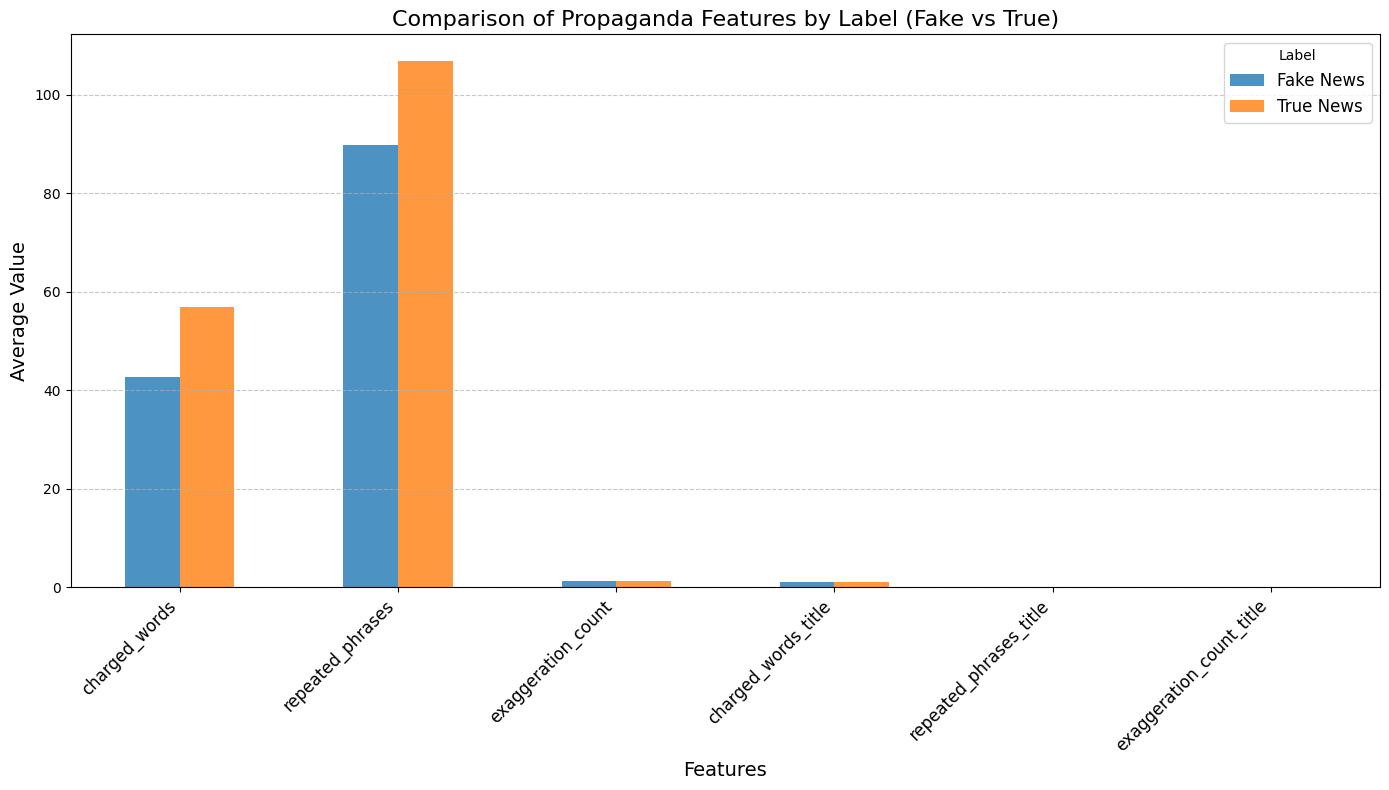

In [49]:
# Create grouped bar chart
plt.figure(figsize=(14, 8))
feature_means_t.plot(kind='bar', figsize=(14, 8), alpha=0.8)
plt.title('Comparison of Propaganda Features by Label (Fake vs True)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Label', labels=['Fake News', 'True News'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


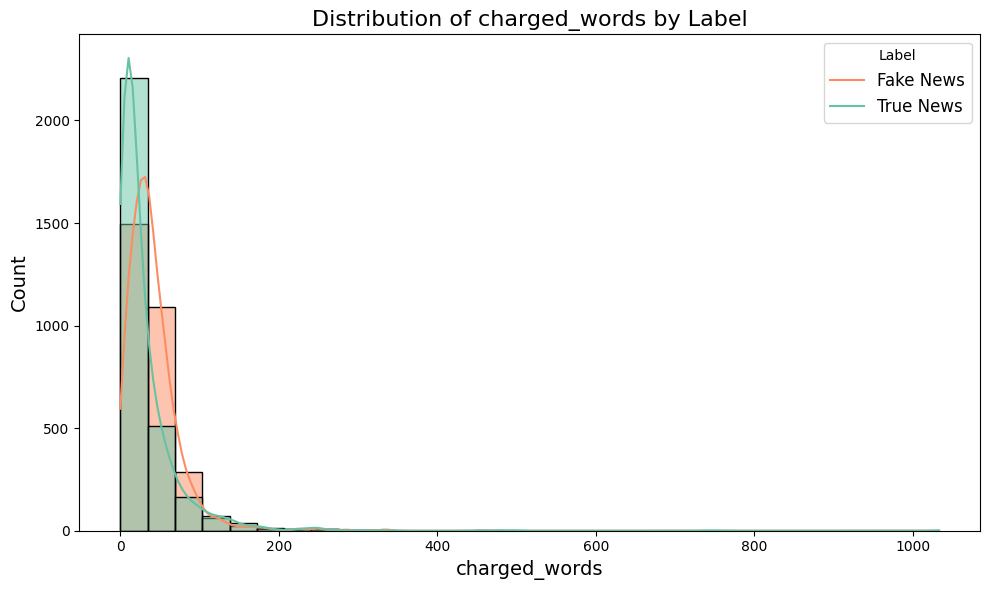

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

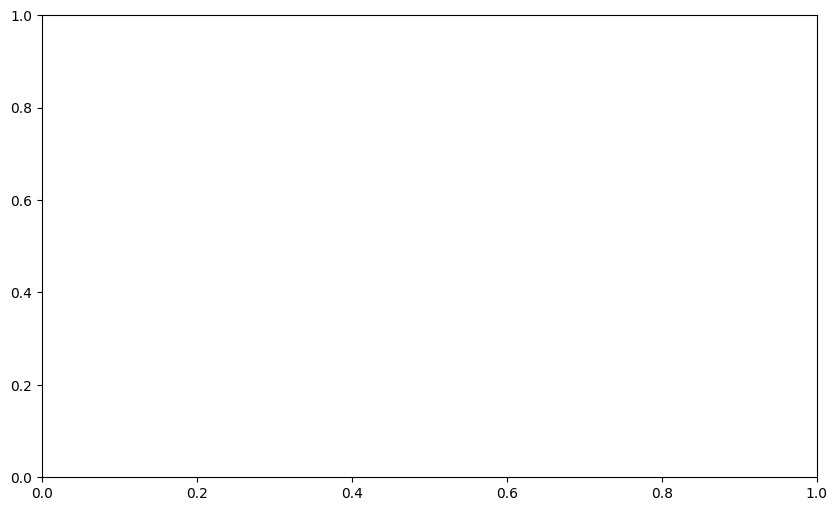

In [41]:
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=combined_data, x=feature, hue='label', kde=True, palette='Set2', bins=30)
    plt.title(f'Distribution of {feature} by Label', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Label', labels=['Fake News', 'True News'], fontsize=12)
    plt.tight_layout()
    plt.show()


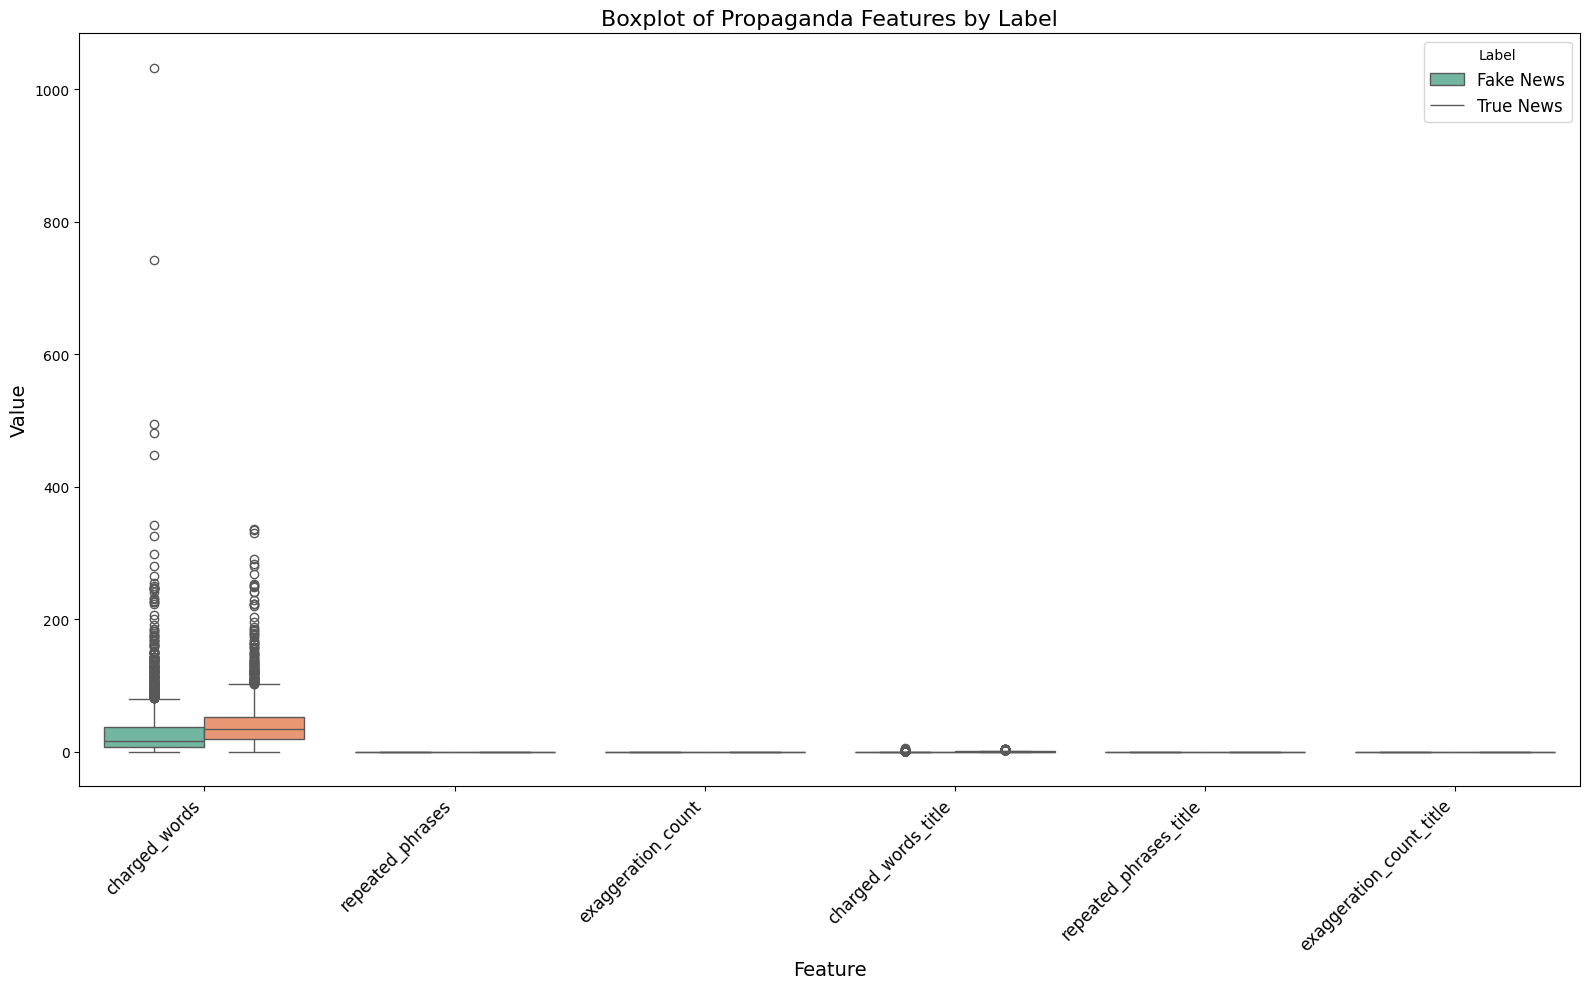

In [42]:
plt.figure(figsize=(16, 10))
data_melted = combined_data.melt(id_vars='label', value_vars=features, var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='label', data=data_melted, palette='Set2')
plt.title('Boxplot of Propaganda Features by Label', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Label', labels=['Fake News', 'True News'], fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
sentiment_features = combined_data[['title_sentiment', 'text_sentiment', 'title_polarity', 'text_polarity', 'title_subjectivity', 'text_subjectivity']].values
propaganda_features = combined_data[['charged_words', 'repeated_phrases', 'exaggeration_count']].values

X = np.hstack((sentiment_features, propaganda_features))
y = combined_data['label']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\xgboost\core.py:158: UserWarning: [19:11:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [53]:

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6430948419301165
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64       577
           1       0.67      0.63      0.65       625

    accuracy                           0.64      1202
   macro avg       0.64      0.64      0.64      1202
weighted avg       0.64      0.64      0.64      1202



[[382 195]
 [234 391]]


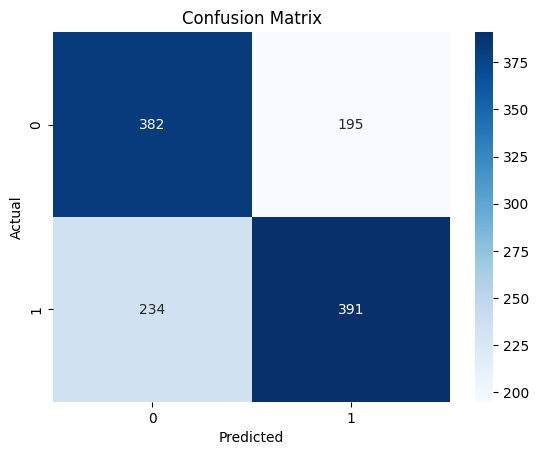

In [54]:
# confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x800 with 0 Axes>

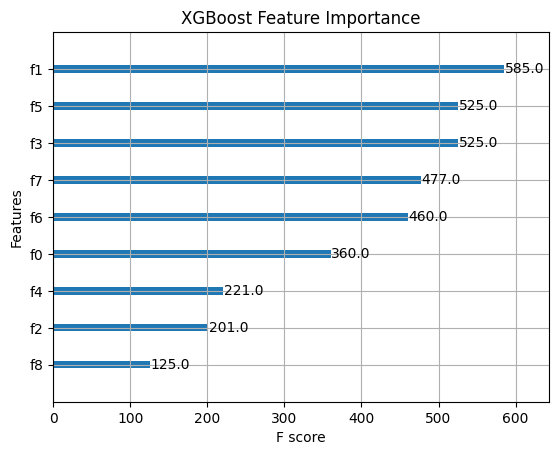

In [55]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=20)
plt.title("XGBoost Feature Importance")
plt.show()


Precision: 0.67
Recall: 0.63
F1 Score: 0.65


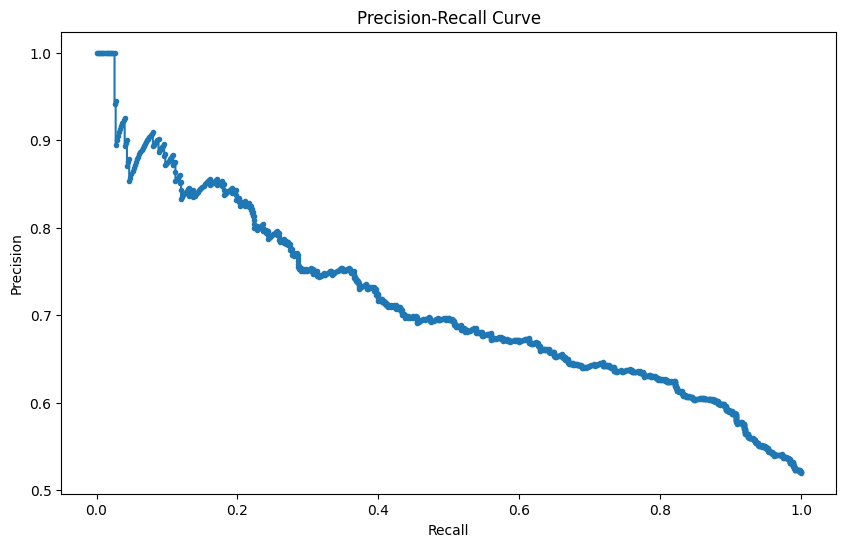

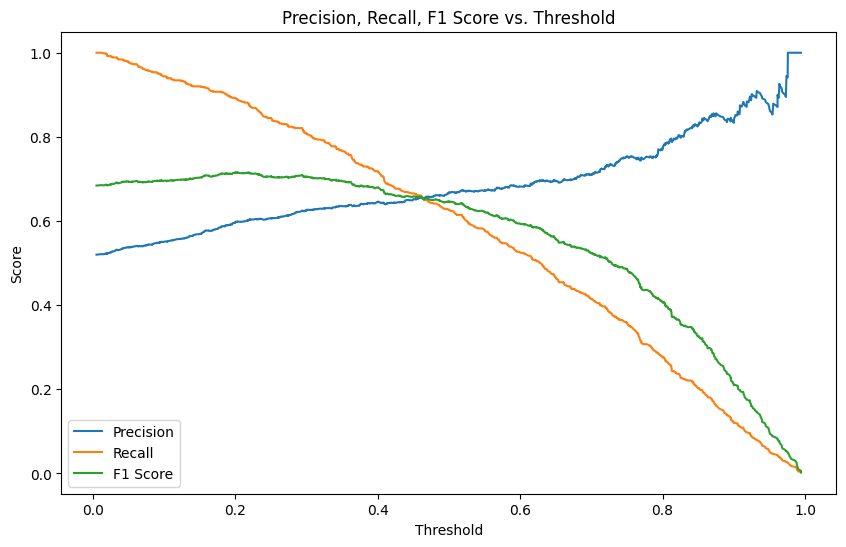

In [56]:
# precission recall f1 score

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")

print(f"Recall: {recall:.2f}")

print(f"F1 Score: {f1_score:.2f}")

# plot precision recall f1 score

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# plot f1 recall precission

plt.figure(figsize=(10, 6))

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]), label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score vs. Threshold')
plt.legend()
plt.show()




### Additional Sentiment Featuers

In [9]:
from textblob import TextBlob

def sentence_sentiment_stats(text):
    blob = TextBlob(text)
    sentence_sentiments = [sentence.sentiment.polarity for sentence in blob.sentences]
    if not sentence_sentiments:
        return 0, 0, 0, 0
    return (
        max(sentence_sentiments),  
        min(sentence_sentiments),  
        sum(sentence_sentiments) / len(sentence_sentiments),  
        sum([(x - sum(sentence_sentiments) / len(sentence_sentiments)) ** 2 for x in sentence_sentiments]) / len(sentence_sentiments)  # Variance
    )

combined_data[['sent_max', 'sent_min', 'sent_mean', 'sent_var']] = combined_data['text'].apply(
    lambda x: pd.Series(sentence_sentiment_stats(x))
)


In [10]:
combined_data[['sent_max_title', 'sent_min_title', 'sent_mean_title', 'sent_var_title']] = combined_data['title'].apply(
    lambda x: pd.Series(sentence_sentiment_stats(x))
)

In [12]:
def first_last_sentiment(text):
    blob = TextBlob(text)
    if blob.sentences:
        first_sentiment = blob.sentences[0].sentiment.polarity
        last_sentiment = blob.sentences[-1].sentiment.polarity
    else:
        first_sentiment, last_sentiment = 0, 0
    return first_sentiment, last_sentiment

combined_data[['first_sentiment', 'last_sentiment']] = combined_data['text'].apply(
    lambda x: pd.Series(first_last_sentiment(x))
)


In [13]:
combined_data[['first_sentiment_title', 'last_sentiment_title']] = combined_data['title'].apply(
    lambda x: pd.Series(first_last_sentiment(x))
)

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

nltk.download('vader_lexicon')

vader_analyzer = SentimentIntensityAnalyzer()

def word_level_sentiment(text):
    pos_count, neg_count, neu_count = 0, 0, 0
    for word in text.split():
        score = vader_analyzer.polarity_scores(word)
        if score['compound'] > 0.05:
            pos_count += 1
        elif score['compound'] < -0.05:
            neg_count += 1
        else:
            neu_count += 1
    total_words = pos_count + neg_count + neu_count
    return pos_count / total_words, neg_count / total_words, neu_count / total_words

# combined_data[['pos_word_ratio', 'neg_word_ratio', 'neu_word_ratio']] = combined_data['text'].apply(
#     lambda x: pd.Series(word_level_sentiment(x))
# )


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RoG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
combined_data[['pos_word_ratio_title', 'neg_word_ratio_title', 'neu_word_ratio_title']] = combined_data['title'].apply(
    lambda x: pd.Series(word_level_sentiment(x))
)

In [19]:
def sentiment_shift(text):
    blob = TextBlob(text)
    sentiments = [sentence.sentiment.polarity for sentence in blob.sentences]
    if len(sentiments) < 2:
        return 0  # Not enough data to compute shifts
    shifts = [abs(sentiments[i] - sentiments[i - 1]) for i in range(1, len(sentiments))]
    return sum(shifts) / len(shifts)  # Average shift

# combined_data['sentiment_shift'] = combined_data['text'].apply(sentiment_shift)
combined_data['sentiment_shift_title'] = combined_data['title'].apply(sentiment_shift)

import nltk
nltk.download('averaged_perceptron_tagger')

def sentiment_by_pos(text, pos_tag):
    blob = TextBlob(text)
    tokens = blob.tags  # Returns (word, POS) tuples
    pos_words = [word for word, tag in tokens if tag.startswith(pos_tag)]
    if not pos_words:
        return 0  # No relevant words
    sentiments = [TextBlob(word).sentiment.polarity for word in pos_words]
    return sum(sentiments) / len(sentiments)

# combined_data['noun_sentiment'] = combined_data['text'].apply(lambda x: sentiment_by_pos(x, 'NN'))  # Nouns
# combined_data['verb_sentiment'] = combined_data['text'].apply(lambda x: sentiment_by_pos(x, 'VB'))  # Verbs

combined_data['noun_sentiment_title'] = combined_data['title'].apply(lambda x: sentiment_by_pos(x, 'NN'))  # Nouns
combined_data['verb_sentiment_title'] = combined_data['title'].apply(lambda x: sentiment_by_pos(x, 'VB'))  # Verbs

import spacy
nlp = spacy.load('en_core_web_sm')

def named_entity_sentiment(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    if not entities:
        return 0  # No entities to analyze
    sentiments = [TextBlob(ent).sentiment.polarity for ent in entities]
    return sum(sentiments) / len(sentiments)

# combined_data['entity_sentiment'] = combined_data['text'].apply(named_entity_sentiment)
combined_data['entity_sentiment_title'] = combined_data['title'].apply(named_entity_sentiment)

def extreme_sentiment_words(text):
    blob = TextBlob(text)
    return sum(1 for word in blob.words if abs(TextBlob(word).sentiment.polarity) > 0.7)

# combined_data['extreme_sentiment_words'] = combined_data['text'].apply(extreme_sentiment_words)
combined_data['extreme_sentiment_words_title'] = combined_data['title'].apply(extreme_sentiment_words)

def sentiment_trajectory(text):
    blob = TextBlob(text)
    sentiments = [sentence.sentiment.polarity for sentence in blob.sentences]
    if len(sentiments) < 2:
        return 0  # Not enough data for trajectory
    trajectory = sum(1 for i in range(1, len(sentiments)) if sentiments[i] > sentiments[i - 1])
    return trajectory / (len(sentiments) - 1)  # Proportion of upward sentiment shifts

# combined_data['sentiment_trajectory'] = combined_data['text'].apply(sentiment_trajectory)
combined_data['sentiment_trajectory_title'] = combined_data['title'].apply(sentiment_trajectory)

def repetition_ratio(text):
    words = text.split()
    return (len(words) - len(set(words))) / len(words) if words else 0

# combined_data['repetition_ratio'] = combined_data['text'].apply(repetition_ratio)
combined_data['repetition_ratio_title'] = combined_data['title'].apply(repetition_ratio)
# combined_data['punctuation_density'] = combined_data['text'].apply(
#     lambda x: (x.count('!') + x.count('?')) / len(x) if len(x) > 0 else 0
# )
combined_data['punctuation_density_title'] = combined_data['title'].apply(
    lambda x: (x.count('!') + x.count('?')) / len(x) if len(x) > 0 else 0
)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\RoG\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [66]:
import textstat

def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if words else 0

combined_data['lexical_diversity'] = combined_data['text'].apply(lexical_diversity)



combined_data['flesch_reading_ease'] = combined_data['text'].apply(textstat.flesch_reading_ease)
combined_data['smog_index'] = combined_data['text'].apply(textstat.smog_index)

combined_data['exclamation_count'] = combined_data['text'].str.count('!')
combined_data['question_count'] = combined_data['text'].str.count('\\?')

# Add new features to combined_data
combined_data['sentiment_shift'] = combined_data['text'].apply(sentiment_shift)
combined_data['noun_sentiment'] = combined_data['text'].apply(lambda x: sentiment_by_pos(x, 'NN'))
combined_data['verb_sentiment'] = combined_data['text'].apply(lambda x: sentiment_by_pos(x, 'VB'))
combined_data['entity_sentiment'] = combined_data['text'].apply(named_entity_sentiment)
combined_data['extreme_sentiment_words'] = combined_data['text'].apply(extreme_sentiment_words)
combined_data['sentiment_trajectory'] = combined_data['text'].apply(sentiment_trajectory)
combined_data['repetition_ratio'] = combined_data['text'].apply(repetition_ratio)
combined_data['punctuation_density'] = combined_data['text'].apply(
    lambda x: (x.count('!') + x.count('?')) / len(x) if len(x) > 0 else 0
)



In [20]:
def lexical_richness(text):
    words = text.split()
    return len(set(words)) / len(words) if len(words) > 0 else 0

# combined_data['lexical_richness'] = combined_data['text'].apply(lexical_richness)
combined_data['lexical_richness_title'] = combined_data['title'].apply(lexical_richness)


In [21]:
def sentiment_by_adjective_adverb(text):
    blob = TextBlob(text)
    adjectives = [word for word, tag in blob.tags if tag.startswith('JJ')]  # Adjectives
    adverbs = [word for word, tag in blob.tags if tag.startswith('RB')]  # Adverbs
    adj_sent = sum(TextBlob(word).sentiment.polarity for word in adjectives) / len(adjectives) if adjectives else 0
    adv_sent = sum(TextBlob(word).sentiment.polarity for word in adverbs) / len(adverbs) if adverbs else 0
    return adj_sent, adv_sent

# combined_data[['adj_sentiment', 'adv_sentiment']] = combined_data['text'].apply(
#     lambda x: pd.Series(sentiment_by_adjective_adverb(x))
# )
combined_data[['adj_sentiment_title', 'adv_sentiment_title']] = combined_data['title'].apply(
    lambda x: pd.Series(sentiment_by_adjective_adverb(x))
)

def sentiment_peaks(text):
    blob = TextBlob(text)
    sentiments = [sentence.sentiment.polarity for sentence in blob.sentences]
    strong_positive = sum(1 for s in sentiments if s > 0.5)  # Strongly positive sentences
    strong_negative = sum(1 for s in sentiments if s < -0.5)  # Strongly negative sentences
    return strong_positive, strong_negative

# combined_data[['strong_positive_sentences', 'strong_negative_sentences']] = combined_data['text'].apply(
#     lambda x: pd.Series(sentiment_peaks(x))
# )
combined_data[['strong_positive_sentences_title', 'strong_negative_sentences_title']] = combined_data['title'].apply(
    lambda x: pd.Series(sentiment_peaks(x))
)




In [ ]:
def emotion_ratios(text, emotion):
    total_words = len(text.split())
    emotion_count = emotion_count(text, emotion)  # Using the earlier emotion_count function
    return emotion_count / total_words if total_words > 0 else 0

combined_data['anger_ratio'] = combined_data['text'].apply(lambda x: emotion_ratios(x, 'anger'))
combined_data['joy_ratio'] = combined_data['text'].apply(lambda x: emotion_ratios(x, 'joy'))
combined_data['sadness_ratio'] = combined_data['text'].apply(lambda x: emotion_ratios(x, 'sadness'))
combined_data['trust_ratio'] = combined_data['text'].apply(lambda x: emotion_ratios(x, 'trust'))

In [22]:

# Add new features to the existing sentiment_features
sentiment_features = combined_data[[
    # Existing features
    'title_sentiment', 'text_sentiment', 'title_polarity', 'text_polarity', 
    'title_subjectivity', 'text_subjectivity', 'sent_max', 'sent_min',
    'sent_mean', 'sent_var', 'first_sentiment', 'last_sentiment',
    'pos_word_ratio', 'neg_word_ratio', 'neu_word_ratio', 
    'lexical_diversity', 'flesch_reading_ease', 'smog_index', 
    'exclamation_count', 'question_count',
    # New features
    'sentiment_shift', 'noun_sentiment', 'verb_sentiment', 'entity_sentiment',
     'extreme_sentiment_words', 'sentiment_trajectory',
    'repetition_ratio', 'punctuation_density', 'lexical_richness',
    'adj_sentiment', 'adv_sentiment', 'strong_positive_sentences', 'strong_negative_sentences',
    'sent_max_title', 'sent_min_title', 'sent_mean_title', 'sent_var_title', 'first_sentiment_title',
    'last_sentiment_title', 'pos_word_ratio_title', 'neg_word_ratio_title', 'neu_word_ratio_title',
    'lexical_richness_title', 'adj_sentiment_title', 'adv_sentiment_title',
    'strong_positive_sentences_title', 'strong_negative_sentences_title'
    
]].values

propaganda_features = combined_data[['charged_words', 'repeated_phrases', 'exaggeration_count']].values

X = sentiment_features 
y = combined_data['label']



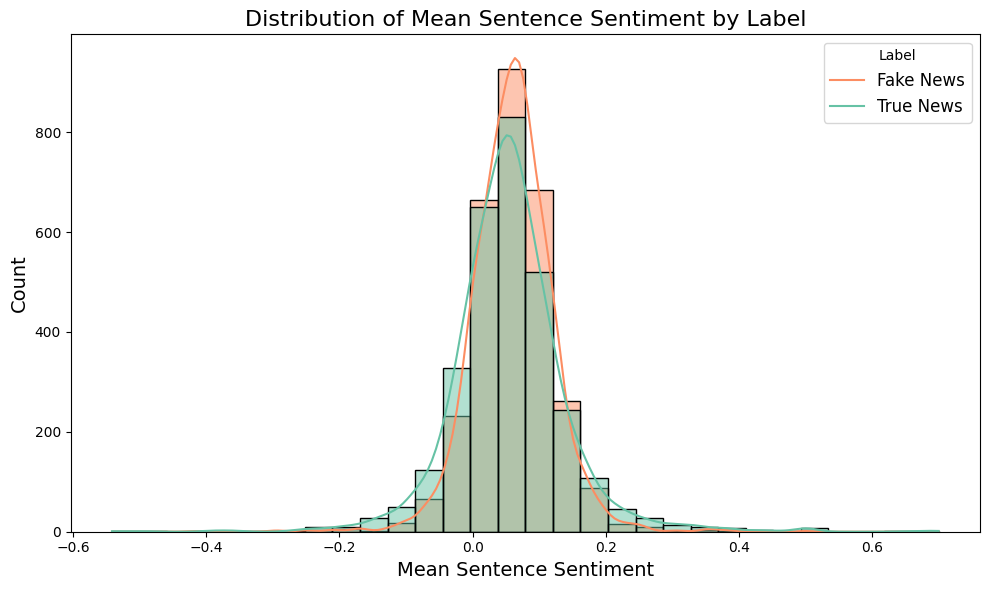

In [8]:
# plot sent_mean by label

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='sent_mean', hue='label', kde=True, palette='Set2', bins=30)
plt.title('Distribution of Mean Sentence Sentiment by Label', fontsize=16)
plt.xlabel('Mean Sentence Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Label', labels=['Fake News', 'True News'], fontsize=12)
plt.tight_layout()
plt.show()


In [25]:
combined_data.to_csv('combined_data_with_features.csv', index=False)

In [1]:
import pandas as pd

combined_data = pd.read_csv('combined_data_with_features.csv')

In [23]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7221297836938436
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71       577
           1       0.74      0.72      0.73       625

    accuracy                           0.72      1202
   macro avg       0.72      0.72      0.72      1202
weighted avg       0.72      0.72      0.72      1202



c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\xgboost\core.py:158: UserWarning: [18:21:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7279534109816972
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73       577
           1       0.76      0.70      0.73       625

    accuracy                           0.73      1202
   macro avg       0.73      0.73      0.73      1202
weighted avg       0.73      0.73      0.73      1202



[[430 147]
 [190 435]]


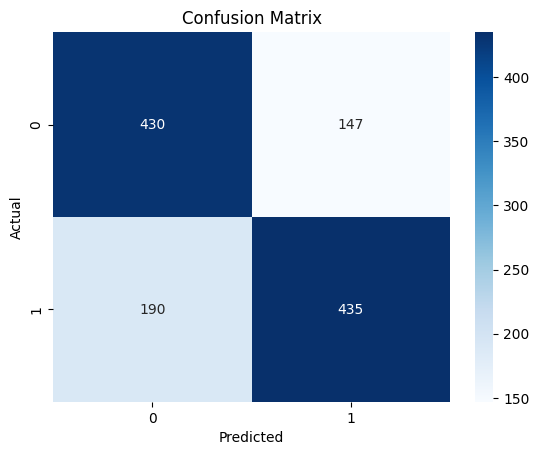

In [160]:
# confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x800 with 0 Axes>

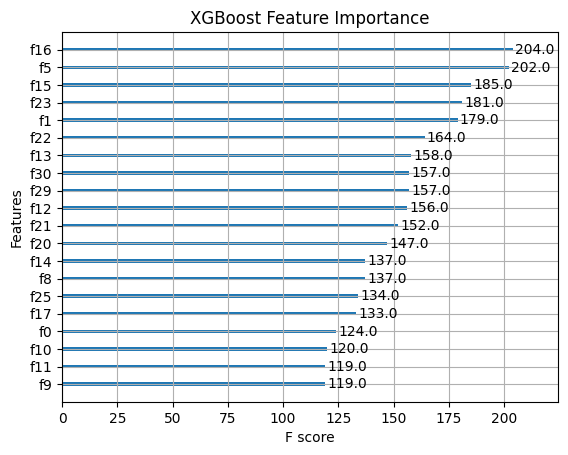

In [161]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=20)
plt.title("XGBoost Feature Importance")
plt.show()


Precision: 0.75
Recall: 0.70
F1 Score: 0.72


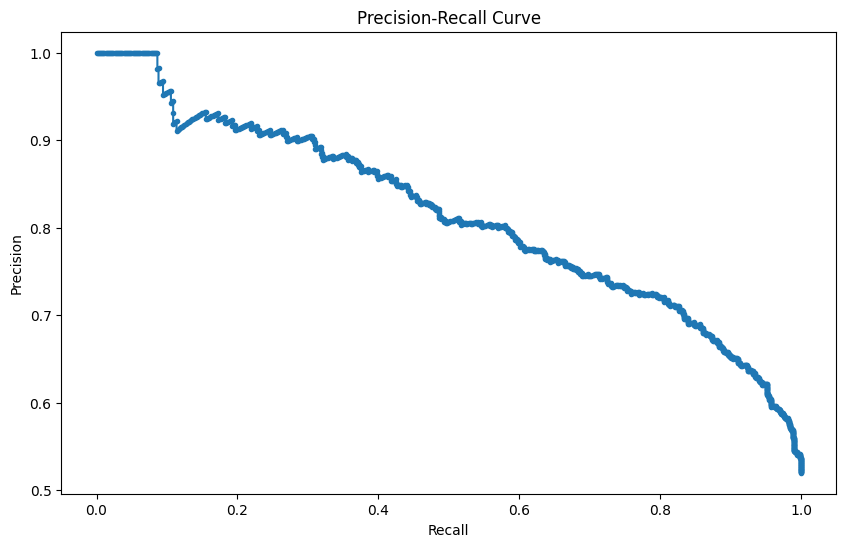

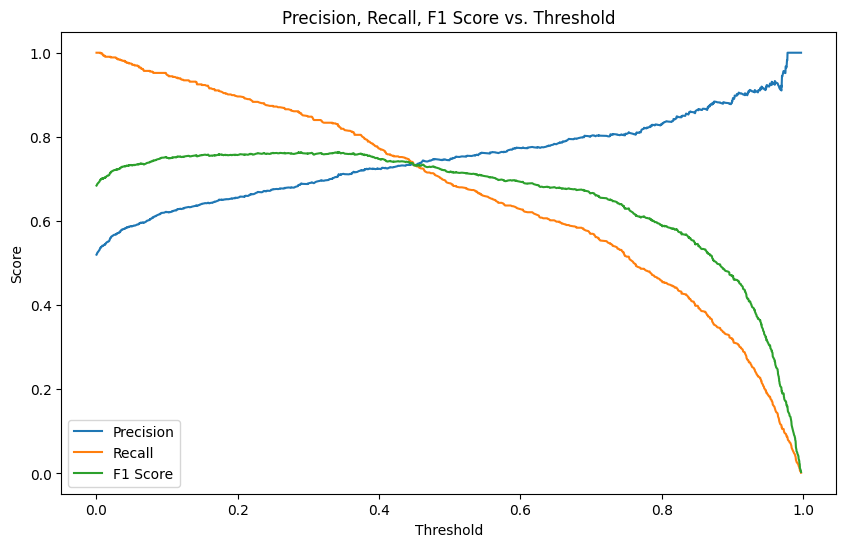

In [162]:
# precission recall f1 score

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")

print(f"Recall: {recall:.2f}")

print(f"F1 Score: {f1_score:.2f}")

# plot precision recall f1 score

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# plot f1 recall precission

plt.figure(figsize=(10, 6))

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]), label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score vs. Threshold')
plt.legend()
plt.show()




### Combined Features

In [126]:
X = np.hstack((sentiment_features, text_embeddings, title_embeddings))
y = combined_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Users\RoG\anaconda3\envs\licenta\lib\site-packages\xgboost\core.py:158: UserWarning: [03:12:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9334442595673876
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       577
           1       0.94      0.93      0.94       625

    accuracy                           0.93      1202
   macro avg       0.93      0.93      0.93      1202
weighted avg       0.93      0.93      0.93      1202



[[542  35]
 [ 45 580]]


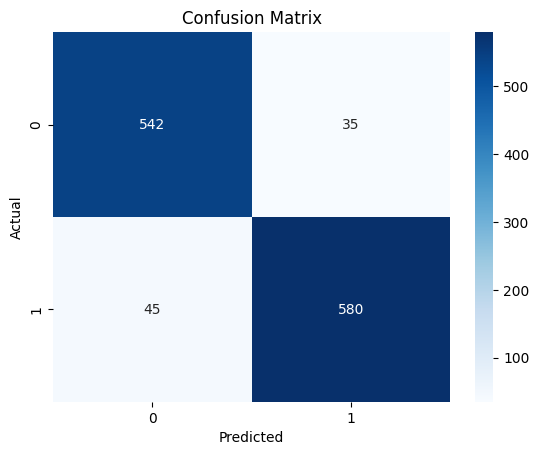

In [127]:
# confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x800 with 0 Axes>

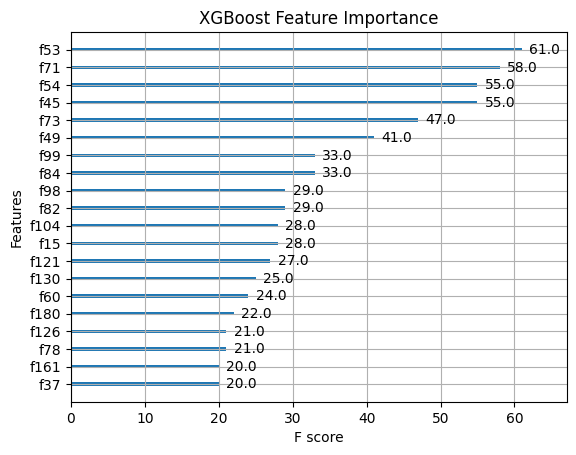

In [128]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=20)
plt.title("XGBoost Feature Importance")
plt.show()


Precision: 0.94
Recall: 0.93
F1 Score: 0.94


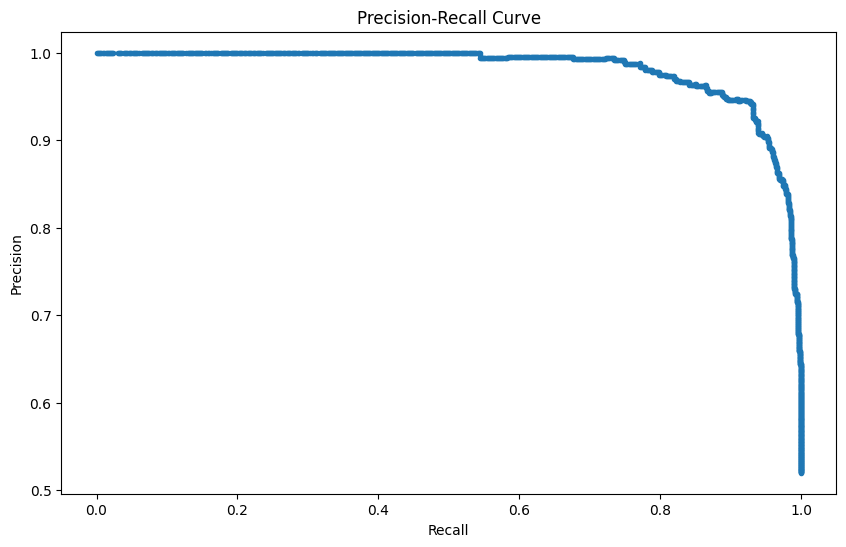

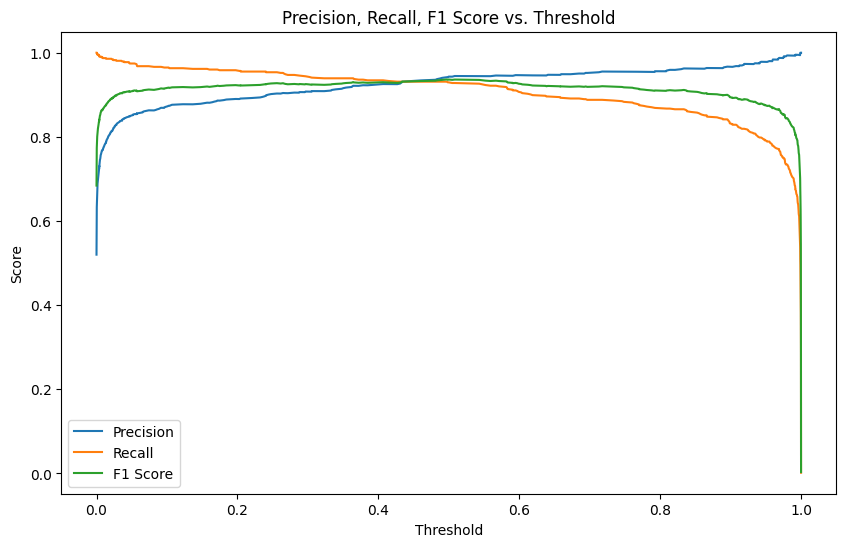

In [129]:
# precission recall f1 score

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")

print(f"Recall: {recall:.2f}")

print(f"F1 Score: {f1_score:.2f}")

# plot precision recall f1 score

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# plot f1 recall precission

plt.figure(figsize=(10, 6))

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1]), label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score vs. Threshold')
plt.legend()
plt.show()


